# Causes derrière la consommation de drogue 

Vous allez retouver sur ce notebook les différentes analyses effectuées dans l'optique de répondre à la problématique suivante :
- Peut-on prédire la consommation de drogue "dure" ou dangereuse selon la personnalité et l'environnement des jeunes (18-24) ?

URL to our dataset : https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

Le dataset que nous allons traité a été collecté en 2016. 
Le traitement de notre data passera par un travail de classification afin de déterminer si des profils ressortent dans notre dataset.

Poure ce faire, nous allons passer par les étapes suivantes :
- Description et exploration en surface de la data
- Data Cleaning 
- Data Wrangling (exploration plus approffondie)
- Visualisation de la data (maintenant qu'on a un jeu de données exploitables, on peut le visualiser)
- Action (ML models etc )

### *Table of Contents*

- Supervised Learning 🔎
  - [Chargement et description des données](#desc) 
  - [Exercice 2](#exercise-2) 

---

## <p style = 'text-align: center;'>Chargement et Description des données</p> 


---

In [1759]:
# Requirements

from mapping import *


import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import seaborn as sns 
import plotly_express as px

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelBinarizer
from sklearn.compose import make_column_transformer

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score


from IPython.display import display, HTML 

css = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(css))

In [1589]:
# chargement des données
# noms des colonnes

data =  pd.read_csv('drug_consumption.csv', sep=",", header = None)
original_data = data.copy()


data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


Nom de chaque colonne : 

In [1590]:
data.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64')

Nous allons renommer ces colonnes 

In [1591]:
names_column = ['ID','age','gender','education','country','ethnicity','Stress_score','escore','oscore','ascore','cscore','impulsive_bis11','sensation_ImpSS','alcohol','amphet','amyl','benzos','caff','cannabis','choc','coke','crack','ecstasy','heroin','ketamine','legalhigh','LSD','meth','mushrooms','nicotine','semer','VSabuse']

In [1592]:
columns_dict = dict(zip(list(range(len(data.columns))),names_column))

data.rename(columns = columns_dict, inplace = True)
original_data.rename(columns = columns_dict,inplace = True)

#data.rename( columns = names_column )

In [1593]:
data.columns

Index(['ID', 'age', 'gender', 'education', 'country', 'ethnicity',
       'Stress_score', 'escore', 'oscore', 'ascore', 'cscore',
       'impulsive_bis11', 'sensation_ImpSS', 'alcohol', 'amphet', 'amyl',
       'benzos', 'caff', 'cannabis', 'choc', 'coke', 'crack', 'ecstasy',
       'heroin', 'ketamine', 'legalhigh', 'LSD', 'meth', 'mushrooms',
       'nicotine', 'semer', 'VSabuse'],
      dtype='object')

In [1594]:
print(data.describe)

<bound method NDFrame.describe of         ID      age   gender  education  country  ethnicity  Stress_score  \
0        1  0.49788  0.48246   -0.05921  0.96082    0.12600       0.31287   
1        2 -0.07854 -0.48246    1.98437  0.96082   -0.31685      -0.67825   
2        3  0.49788 -0.48246   -0.05921  0.96082   -0.31685      -0.46725   
3        4 -0.95197  0.48246    1.16365  0.96082   -0.31685      -0.14882   
4        5  0.49788  0.48246    1.98437  0.96082   -0.31685       0.73545   
...    ...      ...      ...        ...      ...        ...           ...   
1880  1884 -0.95197  0.48246   -0.61113 -0.57009   -0.31685      -1.19430   
1881  1885 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685      -0.24649   
1882  1886 -0.07854  0.48246    0.45468 -0.57009   -0.31685       1.13281   
1883  1887 -0.95197  0.48246   -0.61113 -0.57009   -0.31685       0.91093   
1884  1888 -0.95197 -0.48246   -0.61113  0.21128   -0.31685      -0.46725   

       escore   oscore   ascore  ...  ecs

Nous allons travailler sur deux jeux de données : 
- data : jeu de données générales sur l'ensemble des ages 
- data_jeunes : jeu de données se focalisant sur les jeunes [18ans-25ans]

In [1595]:
# description des données/ nombre d'invidus et nombre de caractéristiques
# 1er jeu de données
data.shape

(1885, 32)

- 1885 rows -> 1885 d'individus 
- 32 columns : 32 caractéristiques d'individus

In [1596]:
# 2ème jeu de données
data_jeunes = data.loc[data['age'] == -0.95197]

In [1597]:
data_jeunes.shape

(643, 32)

In [1598]:
pourcentage_jeunes = (data_jeunes.shape[0]/data.shape[0])*100

In [1599]:
print('il y a ',data_jeunes.shape[0],' jeunes sur 1885 individus soit : ',round(pourcentage_jeunes,2), '% de jeunes dans notre jeu de données')

il y a  643  jeunes sur 1885 individus soit :  34.11 % de jeunes dans notre jeu de données


In [1600]:
# description des colonnes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1885 non-null   int64  
 1   age              1885 non-null   float64
 2   gender           1885 non-null   float64
 3   education        1885 non-null   float64
 4   country          1885 non-null   float64
 5   ethnicity        1885 non-null   float64
 6   Stress_score     1885 non-null   float64
 7   escore           1885 non-null   float64
 8   oscore           1885 non-null   float64
 9   ascore           1885 non-null   float64
 10  cscore           1885 non-null   float64
 11  impulsive_bis11  1885 non-null   float64
 12  sensation_ImpSS  1885 non-null   float64
 13  alcohol          1885 non-null   object 
 14  amphet           1885 non-null   object 
 15  amyl             1885 non-null   object 
 16  benzos           1885 non-null   object 
 17  caff          

Incohérence au niveau des types compte tenu des variables avec lesquelles nous allons travailler.\
Exemple : Age devrait être un Integer pas un float et l'éthnicité qui est une variable à priori, nominale ne peut pas être Float non plus.

Nous allons dès lors essayer de mieux comprendre cers incohérences

Nous observons trois Grands types de colonnes : 
- Colonnes décrivant le profil de l'individu ( profil )<br />---> nous permettra d'en savoir plus sur son environnement de vie.

- Colonnes décrivant la personnalité de l'individu ( perso )<br />---> nous permettra d'en savoir plus sur ses traits de personnalité.

- Colonnes décrivant la fréquence de consommation de drogues ( drugs )<br />---> nous permettra de définir notre Target ( predicting the consommation is what we are searching for )


In [1601]:
l_perso = list(range(6,13))
l_drugs = list(range(13,32))

l_perso.append(0)
l_drugs.append(0)

In [1602]:
profil = data.iloc[:,0:6]
profil.set_index('ID',inplace = True)

perso = data.iloc[:,l_perso]
perso.set_index('ID',inplace = True)

drugs = data.iloc[:,l_drugs]
drugs.set_index('ID',inplace = True)

profil_jeunes = data_jeunes.iloc[:,0:6]
profil_jeunes.set_index('ID',inplace = True)

perso_jeunes = data_jeunes.iloc[:,l_perso]
perso_jeunes.set_index('ID',inplace = True)

drugs_jeunes = data_jeunes.iloc[:,l_drugs]
drugs_jeunes.set_index('ID',inplace = True)

In [1603]:
drugs

,alcohol,amphet,amyl,benzos,caff,cannabis,choc,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine,semer,VSabuse
ID,,,,,,,,,,,,,,,,,,,
1,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1885,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1886,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0


Décrivons en premier lieu les colonnes décrivant le profil de l'individu\
Les colonnes 'profil' :
- ID : Categorical variable
- Age : Interval variable 
- Genre : Categorical variable 
- Education : Ordinal Variable 
- Pays : Categorical Variable 
- Ethnicité : Categorical Variable 

Soit 6 colonnes.

In [1604]:
for i in range(1,6) :
    print('La colonne \'',names_column[i],'\' a ',len(profil.iloc[:,i-1].unique()),' valeurs uniques ',data.iloc[:,i].unique(),'\n')
    


La colonne ' age ' a  6  valeurs uniques  [ 0.49788 -0.07854 -0.95197  2.59171  1.09449  1.82213] 

La colonne ' gender ' a  2  valeurs uniques  [ 0.48246 -0.48246] 

La colonne ' education ' a  9  valeurs uniques  [-0.05921  1.98437  1.16365 -1.22751 -1.7379   0.45468 -0.61113 -2.43591
 -1.43719] 

La colonne ' country ' a  7  valeurs uniques  [ 0.96082  0.24923 -0.57009 -0.28519 -0.09765  0.21128 -0.46841] 

La colonne ' ethnicity ' a  7  valeurs uniques  [ 0.126   -0.31685  0.1144  -0.22166 -0.50212 -1.10702  1.90725] 



Conclusion :
Nous pouvons observer que les colonnes 'profil' sont dans l'ensemble catégorique (même si à première vue, les valeurs étant numériques, nous aurions pu penser autrement) et donc que pour leur visualisation, des valeurs de type string seraient plus appropiées à priori.

---

Décrivons les colonnes décrivant la personnalité l'individu\
Les colonnes 'perso':

- les colonnes se basant sur le test NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness),
- la colonne impulsivité selon le test BIS-11 (impulsivity), 
- la colonne de sensation selon le test ImpSS (sensation seeking)

Soit 7 colonnes.

In [1605]:
for i in range(6,13) :
    print('La colonne \'',names_column[i],'\' a ',len(data.iloc[:,i].unique()),' valeurs uniques ',data.iloc[:,i].unique(),'\n')


La colonne ' Stress_score ' a  49  valeurs uniques  [ 0.31287 -0.67825 -0.46725 -0.14882  0.73545 -1.32828  0.62967 -0.24649
 -1.05308  2.28554 -0.79151 -0.92104 -2.05048 -1.55078  0.52135  1.37297
 -0.34799 -1.1943   0.41667  1.60383 -0.05188  0.04257  1.02119  0.82562
  0.13606  1.13281 -1.43907 -0.58016  0.22393 -2.21844  0.91093 -2.3436
  1.8399   1.49158  3.27393 -1.69163  1.98437  2.82196  1.23461 -1.86962
  2.127   -2.42317  2.46262  1.72012  2.61139 -2.75696 -2.52197 -3.15735
 -3.46436] 

La colonne ' escore ' a  42  valeurs uniques  [-0.57545  1.93886  0.80523 -0.80615 -1.6334  -0.30033 -1.09207  2.57309
  0.00332  0.16767  1.45421 -1.50796 -1.23177 -0.15487 -1.7625   0.47617
 -0.94779 -3.27393  0.63779 -0.43999  1.74091  0.32197  1.2861   0.96248
  1.11406 -0.69509  1.58487 -1.37639 -1.92173  3.00537  2.127    2.32338
 -2.21069 -2.32338 -2.11437 -2.72827 -2.5383  -2.44904 -2.03972  2.8595
  3.27393 -3.00537] 

La colonne ' oscore ' a  35  valeurs uniques  [-0.58331  1.43533 -

# <font color = 'red'>Arthur</font> -> description  des colonnes perso 

Conclusion : Nous pouvons observer que les colonnes 'perso' sont dans l'ensemble numériques (même si à première vue, les valeurs étant numériques, nous aurions pu penser autrement).

---

In [1606]:
categorical_columns = (data.dtypes == 'object')
object_cols = list(categorical_columns[categorical_columns].index)

In [1607]:
object_cols

['alcohol',
 'amphet',
 'amyl',
 'benzos',
 'caff',
 'cannabis',
 'choc',
 'coke',
 'crack',
 'ecstasy',
 'heroin',
 'ketamine',
 'legalhigh',
 'LSD',
 'meth',
 'mushrooms',
 'nicotine',
 'semer',
 'VSabuse']

La dangerosité de chaque drogue est classée selon ce site : 
https://www.frontiersin.org/files/Articles/592199/fpsyt-11-592199-HTML/image_m/fpsyt-11-592199-g001.jpg <br>
C'est un travail de recherche en amont mais le taux de dangerosité de chaque drogue sera prouvée plus tard lors de la phase de pondération, avec un autre jeu de données. Pour le moment, tout ce qui nous intéresse, c'est le fait qu'elle soit considérée comme possiblement dangereuse.
<br><br>
La liste des drogues considérées "dures" et "douces" ici :<br>
https://www.zamnesia.fr/blog-la-classification-des-drogues-dures-et-douces-n1425


Décrivons désormais les colonnes mettant en avant la fréquence de consommation de l'individu\
Les colonnes 'drugs' sont chacune caractéristiques d'une drogue:
- l'alcool : <font color = 'red'>3ème plus dangereuse</font> et <font color = 'red'>'dure'</font>
- l'amphétamine : <font color = 'red'>5ème plus dangereuse</font> et <font color = 'red'>'dure'</font>
- le nitrite d'amyl (utilisation des poppers) : <font color = 'yellow'>Pas considérée comme drogue dure</font> 
- le benzodiazepine : <font color = 'orange'>9ème plus dangereuse</font> et <font color = 'red'>'dure'</font>
- la caffeine : <font color ='green'>Pas considéré comme dangereuse</font>
- le cannabis : <font color = 'orange'>10ème plus dangereuse</font> mais <font color = 'green'>'douce'</font>
- le chocolat : <font color ='green'>Pas considéré comme dangereuse</font>
- la cocaine : <font color = 'red'>4ème plus dangereuse</font> et <font color = 'red'>'dure'</font>
- le crack : <font color = 'red'>1ère plus dangereuse</font> et <font color = 'red'>'dure'</font>
- l'ectasy : <font color = 'orange'>7ème plus dangereuse</font> et <font color = 'red'>'dure'</font>
- l'heroin : <font color = 'red'>2ème plus dangereuse</font> et <font color = 'red'>'dure'</font>
- la ketamine : <font color = 'orange'>8ème plus dangereuse</font> et <font color = 'red'>'dure'</font>
- les euphorisants légaux/Legal Highs (comme les cannabinoides synthétiques) : <font color = 'orange'>6ème plus dangereuse</font> mais <font color = 'green'>'douce'</font>
- le LSD : <font color = 'orange'>12ème plus dangereuse</font> et <font color = 'red'>'dure'</font>
- la methadone : <font color = 'orange'>14ème plus dangereuse</font> et <font color = 'red'>'dure'</font>
- les champignons magiques or magics Mushrooms : <font color = 'orange'>11ème plus dangereuse</font> et <font color = 'red'>'dure'</font>
- la nicotine : <font color = 'orange'>13ème plus dangereuse</font>
- la Semeron : <font color = 'yellow'>Fake</font>
- Les substances volatiles (Abusement) : <font color = 'yellow'>Pas considérée comme drogue dure</font>

Soit 19 colonnes.

In [1608]:
list(drugs.columns)

['alcohol',
 'amphet',
 'amyl',
 'benzos',
 'caff',
 'cannabis',
 'choc',
 'coke',
 'crack',
 'ecstasy',
 'heroin',
 'ketamine',
 'legalhigh',
 'LSD',
 'meth',
 'mushrooms',
 'nicotine',
 'semer',
 'VSabuse']

In [1609]:
drugs.dtypes

alcohol      object
amphet       object
amyl         object
benzos       object
caff         object
cannabis     object
choc         object
coke         object
crack        object
ecstasy      object
heroin       object
ketamine     object
legalhigh    object
LSD          object
meth         object
mushrooms    object
nicotine     object
semer        object
VSabuse      object
dtype: object

In [1610]:
drugs_drop_NoDangerous = ['amyl','caff','choc','VSabuse'] # pas considérée dangereuse

drugs_danger = ['crack','heroin','alcohol','coke','amphet','legalhigh',
                'ecstasy','ketamine','benzos','cannabis','mushrooms',
                'LSD','nicotine','methadone']
drugs_danger_ranking = dict(zip(list(range(1,15)),drugs_danger))

drugs_douce = ['amyl','cannabis','legalhigh','semer','VSabuse','caff','choc']
drugs_dure = list(filter(lambda i:i not in drugs_douce,list(drugs.columns)))


In [1611]:
drugs_dure

['alcohol',
 'amphet',
 'benzos',
 'coke',
 'crack',
 'ecstasy',
 'heroin',
 'ketamine',
 'LSD',
 'meth',
 'mushrooms',
 'nicotine']

In [1612]:
drugs_danger_ranking

{1: 'crack',
 2: 'heroin',
 3: 'alcohol',
 4: 'coke',
 5: 'amphet',
 6: 'legalhigh',
 7: 'ecstasy',
 8: 'ketamine',
 9: 'benzos',
 10: 'cannabis',
 11: 'mushrooms',
 12: 'LSD',
 13: 'nicotine',
 14: 'methadone'}

Nous allons donner plutard une pondération  à chaque colonne selon sa dangerosité ! (Lors du modeling à l'aide du deuxième dataset)

Voici les valeurs unique issus de chaque colonne avec la fréquence de chaque valeur unique chez les jeunes :

In [1613]:
drugs_frequency_jeunes_int = (round((drugs_jeunes.apply(pd.value_counts))*100/drugs_jeunes.shape[0],2))

In [1614]:
drugs_frequency_all_int =  (round((drugs.apply(pd.value_counts))*100/drugs.shape[0],2))

In [1615]:
drugs_frequency_jeunes = drugs_frequency_jeunes_int.copy().astype(str)

In [1616]:
drugs_frequency_all = drugs_frequency_all_int.copy().astype(str)

In [1617]:
def join(x) :
    return x + '%'


In [1618]:
for el in list(drugs.columns) :
    drugs_frequency_jeunes[el] = drugs_frequency_jeunes[el].apply(join)
    drugs_frequency_all[el] = drugs_frequency_all[el].apply(join)


In [1619]:
display(drugs_frequency_jeunes)
display(drugs_frequency_all)

# proportion des jeunes dans les fréquences

,alcohol,amphet,amyl,benzos,caff,cannabis,choc,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine,semer,VSabuse
CL0,2.18%,47.59%,75.58%,51.48%,0.31%,9.02%,1.09%,54.28%,88.34%,38.41%,84.6%,74.03%,29.39%,49.61%,66.1%,42.77%,16.64%,99.07%,72.01%
CL1,nan%,0.16%,0.31%,0.47%,0.16%,0.47%,0.16%,0.47%,0.16%,0.16%,nan%,0.31%,0.16%,0.47%,0.16%,0.16%,0.31%,0.31%,2.64%
CL2,2.02%,11.98%,12.75%,10.26%,1.56%,7.15%,0.31%,10.11%,4.98%,10.89%,4.51%,4.98%,14.31%,7.31%,5.91%,11.98%,7.47%,0.16%,14.0%
CL3,11.66%,19.91%,8.09%,16.95%,4.04%,12.44%,3.73%,21.0%,5.29%,26.75%,5.29%,12.44%,32.35%,23.33%,14.62%,28.15%,14.15%,0.31%,7.62%
CL4,18.82%,7.62%,2.33%,10.58%,8.55%,12.13%,21.31%,8.4%,0.62%,15.71%,2.64%,4.35%,11.51%,10.58%,4.67%,12.75%,10.58%,0.16%,1.56%
CL5,42.15%,5.91%,0.62%,4.51%,20.53%,17.73%,35.93%,4.04%,0.62%,5.6%,1.4%,3.58%,6.69%,7.31%,3.73%,4.2%,13.06%,nan%,1.4%
CL6,23.17%,6.84%,0.31%,5.75%,64.85%,41.06%,37.48%,1.71%,nan%,2.49%,1.56%,0.31%,5.6%,1.4%,4.82%,nan%,37.79%,nan%,0.78%


,alcohol,amphet,amyl,benzos,caff,cannabis,choc,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine,semer,VSabuse
CL0,1.8%,51.78%,69.23%,53.05%,1.43%,21.91%,1.7%,55.07%,86.31%,54.16%,85.15%,79.05%,58.04%,56.71%,75.81%,52.1%,22.71%,99.58%,77.19%
CL1,1.8%,12.2%,11.14%,6.15%,0.53%,10.98%,0.16%,8.49%,3.55%,5.99%,3.61%,2.39%,1.54%,13.74%,2.07%,11.09%,10.24%,0.11%,10.61%
CL2,3.61%,12.89%,12.57%,12.41%,1.27%,14.11%,0.53%,14.32%,5.94%,12.41%,4.99%,7.53%,10.5%,9.39%,5.15%,13.79%,10.82%,0.16%,7.16%
CL3,10.5%,10.5%,4.88%,12.52%,3.18%,11.19%,2.86%,13.69%,3.13%,14.69%,3.45%,6.84%,17.14%,11.35%,7.9%,14.59%,9.81%,0.11%,3.24%
CL4,15.23%,3.98%,1.27%,6.37%,5.62%,7.43%,15.7%,5.25%,0.48%,8.28%,1.27%,2.23%,5.84%,5.15%,2.65%,6.1%,5.73%,0.05%,0.69%
CL5,40.27%,3.24%,0.74%,4.46%,14.48%,9.81%,36.23%,2.18%,0.48%,3.34%,0.85%,1.75%,3.4%,2.97%,2.55%,2.12%,8.33%,nan%,0.74%
CL6,26.79%,5.41%,0.16%,5.04%,73.47%,24.56%,42.81%,1.01%,0.11%,1.11%,0.69%,0.21%,3.55%,0.69%,3.87%,0.21%,32.36%,nan%,0.37%


- Comme on pouvait l'imaginer, on peut observer que la plupart des drogues les plus "dures" sont les moins utilisées de par leur dangerosité. (<font color = 'green'>Précisions dans la Data Visualisation</font>)
- On peut également observer que CL1 (used over the last decade) n'est pas trop applicable dans le cas des jeunes et qu'on laissera ces cas isolés de côté. (<font color = 'green'>Précisions dans le Data Wrangling</font>)
- On peut remarquer aussi des pourcentages assez élévé en termes d'utilisation du cannabis chez les jeunes (<font color = 'green'>Précisions dans la Data Visualisation</font>)
- Retenons pour la suite (<font color = red>la partie ML</font>) que le cannabis a un pourcentage d'utilisation très élevé chez les jeunes ! (41% ont proclamé qu'ils en avaient pris la veille)

In [1620]:
for i in range(13,32) :
    print('La colonne \'',names_column[i],'\' a ',len(data.iloc[:,i].unique()),' valeurs uniques ',data.iloc[:,i].unique(),'\n')


La colonne ' alcohol ' a  7  valeurs uniques  ['CL5' 'CL6' 'CL4' 'CL2' 'CL1' 'CL0' 'CL3'] 

La colonne ' amphet ' a  7  valeurs uniques  ['CL2' 'CL0' 'CL1' 'CL3' 'CL5' 'CL4' 'CL6'] 

La colonne ' amyl ' a  7  valeurs uniques  ['CL0' 'CL2' 'CL1' 'CL3' 'CL5' 'CL4' 'CL6'] 

La colonne ' benzos ' a  7  valeurs uniques  ['CL2' 'CL0' 'CL3' 'CL1' 'CL4' 'CL5' 'CL6'] 

La colonne ' caff ' a  7  valeurs uniques  ['CL6' 'CL5' 'CL4' 'CL3' 'CL0' 'CL1' 'CL2'] 

La colonne ' cannabis ' a  7  valeurs uniques  ['CL0' 'CL4' 'CL3' 'CL2' 'CL1' 'CL6' 'CL5'] 

La colonne ' choc ' a  7  valeurs uniques  ['CL5' 'CL6' 'CL4' 'CL0' 'CL3' 'CL2' 'CL1'] 

La colonne ' coke ' a  7  valeurs uniques  ['CL0' 'CL3' 'CL2' 'CL1' 'CL6' 'CL5' 'CL4'] 

La colonne ' crack ' a  7  valeurs uniques  ['CL0' 'CL1' 'CL2' 'CL3' 'CL5' 'CL4' 'CL6'] 

La colonne ' ecstasy ' a  7  valeurs uniques  ['CL0' 'CL4' 'CL1' 'CL3' 'CL2' 'CL6' 'CL5'] 

La colonne ' heroin ' a  7  valeurs uniques  ['CL0' 'CL1' 'CL2' 'CL3' 'CL5' 'CL6' 'CL4'] 

La c

- CL0 : Never Used  (0), n'a jamais été utilisé
- CL1 : Used over a decade (1), a été utilisé il y a plus d'une décennie
- CL2 : Used in Last Decade (2) donc a été utilisé cette dernière décennie
- CL3 : Used in Last Year (3) donc a été utilisé cette dernière année
- CL4 : Used in Last month (4) donc a été utilisé ce mois 
- CL5 : Used Last week (5) donc a été utilisé cette dernière semaine
- CL6 : Used in Last day (6) donc a été utilisé ce dernier jour

---

## <p style = 'text-align: center;'>Data Cleaning and Wrangling</p> 

---

Cette partie sera dédiée au nettoyage (renommer les colonnes,reset des index, drop des colonnes, ) et à la mise en forme de la donnée pour que cette dernière soit prête à l'exploitation.

In [1621]:
data.head()

,ID,age,gender,education,country,ethnicity,Stress_score,escore,oscore,ascore,...,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine,semer,VSabuse
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


## Data Cleaning :

---

- S'aider de l'exploration en première partie et l'approfondir
- S'occuper des N/A s'il y en a
- Trouver les Outliers
- Remettre en forme la data (mapping)
- Filtrer la data davantage 

#### Nous allons commencer par drop les colonnes qui ne nous intéressent pas.
Il y a deux types de colonnes que nous allons drop :
- celles qui n'ont pas d'intérêt dans le sujet (Par exemple, comme nous travaillons avec les drogues dures, le chocolat n'a rien à faire ici)
- celles qui n'ont pas d'intérêt dans le dataset (Par exemple, si la fréquence de CL0 est très grande pour certains types de drogues, cela veut dire que ce n'est pas des drogues utilisées, des outliers)

<font color = 'red'>ARTHUR -> colonnes personnalité to drop</font>

In [1622]:
# initialisons la liste qui contiendra les noms de colonnes à drop
to_drop = []

In [1623]:
# fréquence de CO trop grande 
drugs_frequency_unused = drugs_frequency_jeunes_int.reset_index(drop = True).iloc[0]

In [1624]:
drugs_frequency_unused.info()

<class 'pandas.core.series.Series'>
Index: 19 entries, alcohol to VSabuse
Series name: 0
Non-Null Count  Dtype  
--------------  -----  
19 non-null     float64
dtypes: float64(1)
memory usage: 860.0+ bytes


In [1625]:
drugs_frequency_unused[drugs_frequency_unused >= 90] # 90

semer    99.07
Name: 0, dtype: float64

La seule drogue qui n'est quasi pas utilisée par les jeunes est le semeron et c'est normal car elle n'existe pas.

In [1626]:
# les colonnes 'profil' sont toutes plus ou moins utiles à part 'ID'
# qui nous sert plus à identifier chaque ligne quelque soit le changement fait sur les index

# les colonnes 'perso : aucune qui saute aux yeux 

# les colonnes 'drogues' ne sont pas toutes utiles

#
to_drop.extend(drugs_drop_NoDangerous) # pas d'intérêt dans la problématique

In [1627]:
to_drop.append('semer')

Avant de drop les colonnes, on peut souligner le fait qu'il y a tout de même 1% de personnes qui affirme avoir pris une drogue qui n'exsite pas.

On peut donc remettre en question la légitimité des individus ayant proclamer cela et les drop.

In [1628]:
data.drop(data[data['semer'] != 'CL0'].index)

,ID,age,gender,education,country,ethnicity,Stress_score,escore,oscore,ascore,...,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine,semer,VSabuse
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


Nous sommes passés à 1877 individus

In [1629]:
to_drop

['amyl', 'caff', 'choc', 'VSabuse', 'semer']

In [1630]:
data.drop(to_drop,inplace = True, axis = 1)

In [1631]:
drugs.drop(to_drop,inplace = True, axis = 1)
drugs_jeunes.drop(to_drop,inplace = True, axis = 1)

C:\Users\rayan\AppData\Local\Temp\ipykernel_23820\2740852881.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\rayan\AppData\Local\Temp\ipykernel_23820\2740852881.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1632]:
to_drop.append('age')

In [1633]:
data_jeunes.drop(to_drop,inplace = True, axis = 1) 
# on drop age dans ce jeu de données mais pas dans le 1er comme la colonne n'a qu'une seule valeur unique


C:\Users\rayan\AppData\Local\Temp\ipykernel_23820\2499484773.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1634]:
to_drop

['amyl', 'caff', 'choc', 'VSabuse', 'semer', 'age']

In [1635]:
display(data.head(3))
display(data_jeunes.head(3))

,ID,age,gender,education,country,ethnicity,Stress_score,escore,oscore,ascore,...,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0


,ID,gender,education,country,ethnicity,Stress_score,escore,oscore,ascore,cscore,...,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine
3,4,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2
33,34,-0.48246,0.45468,0.96082,-0.31685,0.41667,-0.30033,0.29338,1.28610,-0.14277,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
154,155,0.48246,-0.61113,0.96082,-0.31685,2.82196,-1.37639,0.72330,-0.45321,0.58489,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0


#### Après avoir étudié les colonnes, nous passons aux index :

In [1636]:
first_row = data.iloc[0]
last_row = data.iloc[-1]

In [1637]:
pd.DataFrame(first_row).T

,ID,age,gender,education,country,ethnicity,Stress_score,escore,oscore,ascore,...,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine
0,1,0.49788,0.48246,-0.05921,0.96082,0.126,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2


In [1638]:
pd.DataFrame(last_row).T

,ID,age,gender,education,country,ethnicity,Stress_score,escore,oscore,ascore,...,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine
1884,1888,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.127,1.65653,1.11406,...,CL3,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6


In [1639]:
display(data.head(2))
display(data.tail(2))

,ID,age,gender,education,country,ethnicity,Stress_score,escore,oscore,ascore,...,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4


,ID,age,gender,education,country,ethnicity,Stress_score,escore,oscore,ascore,...,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL0,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4
1884,1888,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.12700,1.65653,1.11406,...,CL3,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6


On peut voir qu'il ya un décalage étrange entre l'écart initial de l'ID et de l'index aux premières lignes et l'écart qu'on voit aux dernières lignes.\
Nous allons donc voir à quel niveau l'aggrandissement de l'écart occurre en comparant les valeurs index et ID

In [1640]:
# On commence par décaler les valeurs de la colonne ID 
# afin qu'elle puisse matcher avec les valeurs des index

data['ID'].index = data['ID'].index + 1 
Data_ID = pd.concat([pd.Series([0]),data['ID'][:-1]])
Data_ID

0          0
1          1
2          2
3          3
4          4
        ... 
1880    1883
1881    1884
1882    1885
1883    1886
1884    1887
Length: 1885, dtype: int64

In [1641]:
# et on compare
pd.Series(data.index).compare(Data_ID)

,self,other
294,294.0,295.0
295,295.0,296.0
296,296.0,297.0
297,297.0,298.0
298,298.0,300.0
...,...,...
1880,1880.0,1883.0
1881,1881.0,1884.0
1882,1882.0,1885.0
1883,1883.0,1886.0


Avec cette comparaison nous pouvons affirmer que le décalage a commencé avec la ligne 294.

Vérifions qu'il n y ait pas d'anomalie aux alentours de cette ligne.

In [1642]:
data.iloc[290:296]

,ID,age,gender,education,country,ethnicity,Stress_score,escore,oscore,ascore,...,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine
290,291,0.49788,0.48246,-0.05921,0.96082,-1.10702,-0.92104,0.96248,-0.84732,1.45039,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
291,292,0.49788,0.48246,-0.61113,0.96082,-0.31685,0.62967,-1.09207,0.44585,-0.76096,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL4
292,293,1.09449,0.48246,-0.05921,0.96082,-0.31685,-0.05188,-0.15487,-0.58331,-0.60633,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
293,295,-0.07854,0.48246,-0.05921,0.96082,-0.31685,1.13281,0.00332,-0.17779,-0.76096,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6
294,296,-0.95197,0.48246,-1.43719,0.96082,-0.31685,-0.34799,0.47617,-0.17779,-0.60633,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
295,297,0.49788,-0.48246,-0.05921,0.96082,-0.31685,1.37297,-0.43999,0.14143,-0.01729,...,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL0,CL2


Aucune anomalie à priori outre le fait qu"il manque l'individu dont l'ID est 294 et pas seulement vu l'écart qu'on a observé un peu plus haut. ( 3 ID manquant dont le premier est 294)


Cependant peut être qu'une anomalie n'est pas directement visible mais afin de donner une <font color = 'cyan'>unicité à chaque ligne</font> et <font color =cyan>ne pas avoir deux valeurs différentes pour la caractériser</font>, nous allons utiliser les valeurs de la colonne ID comme index !

Vérifions que chaque valeur de la colonne est unique 

In [1643]:
data['ID'].is_unique

True

In [1644]:
data.set_index('ID',inplace = True)

In [1645]:
data_jeunes.set_index('ID',inplace = True)

In [1646]:
display(data.head(5))
display(data_jeunes.head(5))

,age,gender,education,country,ethnicity,Stress_score,escore,oscore,ascore,cscore,...,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine
ID,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2


,gender,education,country,ethnicity,Stress_score,escore,oscore,ascore,cscore,impulsive_bis11,...,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine
ID,,,,,,,,,,,,,,,,,,,,,
4,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,...,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2
34,-0.48246,0.45468,0.96082,-0.31685,0.41667,-0.30033,0.29338,1.28610,-0.14277,-0.71126,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
155,0.48246,-0.61113,0.96082,-0.31685,2.82196,-1.37639,0.72330,-0.45321,0.58489,-0.21712,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
167,-0.48246,-0.61113,0.96082,-0.31685,1.49158,-1.23177,0.72330,-2.35413,-1.92173,0.88113,...,CL3,CL3,CL0,CL0,CL0,CL2,CL0,CL0,CL3,CL6
170,0.48246,-1.22751,0.96082,-0.31685,-0.34799,0.00332,-1.42424,0.59042,-0.14277,-0.71126,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL4


In [1647]:
del first_row['ID']

In [1648]:
# on vérifie
first_row.equals(data.loc[1])
# Si c'est True, c'est que le set_index() s'est bien déroulée

True

In [1649]:
display(pd.DataFrame(data.loc[1]).T)
display(pd.DataFrame(first_row).T)

,age,gender,education,country,ethnicity,Stress_score,escore,oscore,ascore,cscore,...,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine
1,0.49788,0.48246,-0.05921,0.96082,0.126,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2


,age,gender,education,country,ethnicity,Stress_score,escore,oscore,ascore,cscore,...,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine
0,0.49788,0.48246,-0.05921,0.96082,0.126,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2


#### Nous allons nettoyer désormais les colonnes :
- Vérifier qu'il n y a pas plusieurs types de valeurs par colonne 
- Mapping

In [1650]:
data.dtypes

age                float64
gender             float64
education          float64
country            float64
ethnicity          float64
Stress_score       float64
escore             float64
oscore             float64
ascore             float64
cscore             float64
impulsive_bis11    float64
sensation_ImpSS    float64
alcohol             object
amphet              object
benzos              object
cannabis            object
coke                object
crack               object
ecstasy             object
heroin              object
ketamine            object
legalhigh           object
LSD                 object
meth                object
mushrooms           object
nicotine            object
dtype: object

Après inspection :
-  on peut voir que les colonnes 'drugs' sont de type Object. Ce dtype est capable d'englober tout type de data à la fois(int + float + str etc ). On doit donc vérifier leur composition.
- Des variables ayant très peu de valeurs uniques (les variables 'profils') sont des float64 alors que ce type est indicateur de variables numériques
- Les variales de personnalité ont des types qui à priori leur correspondent, à voir.


Commençons par inspecter les variables de 'drugs'

In [1651]:
drugs.dtypes

alcohol      object
amphet       object
benzos       object
cannabis     object
coke         object
crack        object
ecstasy      object
heroin       object
ketamine     object
legalhigh    object
LSD          object
meth         object
mushrooms    object
nicotine     object
dtype: object

## Data Wrangling :

---

- S'aider de l'exploration en première partie et l'approfondir
- S'occuper des N/A s'il y en a
- Trouver les Outliers
- Remettre en forme la data (mapping)
- Filtrer la data davantage 

N/A ? 

In [1652]:
data.isna().sum()

age                0
gender             0
education          0
country            0
ethnicity          0
Stress_score       0
escore             0
oscore             0
ascore             0
cscore             0
impulsive_bis11    0
sensation_ImpSS    0
alcohol            0
amphet             0
benzos             0
cannabis           0
coke               0
crack              0
ecstasy            0
heroin             0
ketamine           0
legalhigh          0
LSD                0
meth               0
mushrooms          0
nicotine           0
dtype: int64

- Bon point : Nous n'avons aucune valeur nulle dans le tableau

Outliers

Comme nous avons pu le remarquer dans l'exploration de données, certains individus de 18 à 24 ans ont des valeurs CL1 dans leur fréquence de consommation de drogues.<br><br>
Cependant CL1 équivaut à <==> la drogue a été consommée il y a plus d'une décennie.<br><br>
En prenant en compte cette information (une consommation de drogue avant 13 ans n'est pas de l'ordre de notre analyse) et la fréquence dérisoire d'individus jeunes possédant une CL1 nous poussent donc à penser que les lignes possédant ces conditions sont <font color = 'red'>des outliers</font>.

In [1653]:
(drugs_frequency_jeunes_int.loc['CL1']).mean()
# la fréquence moyenne des valeurs CL1 est de 0.41% pour les jeunes 
# cette possibilité est représentative est donc isolée

0.4141176470588235

In [1654]:
outliers_CL1 = data[data.age.apply(lambda x:x == -0.95197)]

ID_outliers = outliers_CL1[outliers_CL1.eq('CL1').any(1)].index

data.drop(ID_outliers, inplace = True)



From 1877 rows -> 1869 rows

In [1655]:
round((data[data.age.apply(lambda x:x == -0.95197)].iloc[:,12:].apply(pd.value_counts))*100/drugs_jeunes.shape[0],2)

,alcohol,amphet,benzos,cannabis,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine
CL0,2.02,46.66,50.54,8.86,53.34,86.47,37.33,82.74,72.16,28.62,47.90,65.01,41.37,16.49
CL2,1.71,11.51,9.95,7.00,9.95,4.67,10.58,4.04,4.98,13.53,7.31,5.60,11.66,7.00
CL3,11.51,19.28,16.95,12.29,20.68,5.13,26.28,5.13,12.13,31.88,23.17,14.31,27.68,14.00
CL4,18.35,7.62,10.26,11.82,8.09,0.62,15.40,2.64,4.35,11.35,10.42,4.67,12.60,10.42
CL5,41.06,5.75,4.35,17.57,3.89,0.62,5.44,1.40,3.58,6.69,7.31,3.42,4.20,13.06
CL6,22.86,6.69,5.44,39.97,1.56,NaN,2.49,1.56,0.31,5.44,1.40,4.51,NaN,36.55


In [1656]:
data_jeunes = data_jeunes.drop(ID_outliers)
drugs = drugs.drop(ID_outliers)
drugs_jeunes = drugs_jeunes.drop(ID_outliers)

In [1657]:
round((drugs_jeunes.apply(pd.value_counts))*100/drugs_jeunes.shape[0],2)

,alcohol,amphet,benzos,cannabis,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine
CL0,2.07,47.85,51.83,9.09,54.70,88.68,38.28,84.85,74.00,29.35,49.12,66.67,42.42,16.91
CL2,1.75,11.80,10.21,7.18,10.21,4.78,10.85,4.15,5.10,13.88,7.50,5.74,11.96,7.18
CL3,11.80,19.78,17.38,12.60,21.21,5.26,26.95,5.26,12.44,32.70,23.76,14.67,28.39,14.35
CL4,18.82,7.81,10.53,12.12,8.29,0.64,15.79,2.71,4.47,11.64,10.69,4.78,12.92,10.69
CL5,42.11,5.90,4.47,18.02,3.99,0.64,5.58,1.44,3.67,6.86,7.50,3.51,4.31,13.40
CL6,23.44,6.86,5.58,40.99,1.59,NaN,2.55,1.59,0.32,5.58,1.44,4.63,NaN,37.48


Une autre façon de gérer ces outliers auraient été de les remplacer par des CL0 puisque les CL1 auraient pu être des erreurs de la part des personnes ayant entré ces informations.

In [1658]:
# [data.age.apply(lambda x:x == [18,24])].replace('CL1','CL0',inplace = True)
# on clean aussi les dataframes utilisés en raccourci

#data_jeunes = data_jeunes.where(data_jeunes != 'CL1',other = 'CL0')
#drugs_jeunes = drugs_jeunes.where(drugs_jeunes != 'CL1',other = 'CL0')

- Désormais détéctons les autres outliers en utilisant notre data originale

In [1659]:
def detect_outliers(data_column) :
    seuil = 3
    outliers = []
    mean_data_column = data[data_column].mean()
    std_data_dcolumn = data[data_column].std()
    
    for i in data[data_column] :
        z_score = (i - mean_data_column)/std_data_dcolumn
        if np.abs(z_score) > seuil :
            outliers.append(i)
    
    return set(outliers)
    

In [1660]:
# we need beforehand to encode our object variables
encode_dict_drugs = {'CL0' : 0,
                    'CL1' : 1,
                    'CL2' : 2,
                    'CL3' : 3,
                    'CL4' : 4,
                    'CL5' : 5,
                    'CL6' : 6}



data.iloc[:,12:] = data.iloc[:,12:].applymap(encode_dict_drugs.get)

In [1661]:
outliers_list = []

for column in data.columns :
    outliers_list.append(detect_outliers(column))
    
outliers = dict(zip(data.columns,outliers_list))
outliers

{'age': set(),
 'gender': set(),
 'education': set(),
 'country': set(),
 'ethnicity': {-1.10702, 1.90725},
 'Stress_score': {-3.46436, -3.15735, 3.27393},
 'escore': {-3.27393, -3.00537, 3.00537, 3.27393},
 'oscore': {-3.27393},
 'ascore': {-3.46436, -3.15735, -3.00537, 3.15735, 3.46436},
 'cscore': {-3.46436, -3.15735, 3.00537, 3.46436},
 'impulsive_bis11': {2.90161},
 'sensation_ImpSS': set(),
 'alcohol': {0},
 'amphet': set(),
 'benzos': set(),
 'cannabis': set(),
 'coke': {6},
 'crack': {3, 4, 5, 6},
 'ecstasy': set(),
 'heroin': {4, 5, 6},
 'ketamine': {5, 6},
 'legalhigh': set(),
 'LSD': {6},
 'meth': {6},
 'mushrooms': {6},
 'nicotine': set()}

# A VOIR et A FAIRE

#### Mise en forme de la data (Encoding et Mapping)

D'abord, nous  allons mettre les résultats des tests psychologiques (dataset "perso") en % pour que ce soit plus lisible.


In [1662]:
for i in perso.columns:
    data[i] = data[i] - data[i].min()
    factor = 100 / data[i].max()
    data[i] = round(data[i] * factor,2)

for i in perso.columns:
    perso_jeunes[i] = perso_jeunes[i] - perso_jeunes[i].min()
    factor = 100 / perso_jeunes[i].max()
    perso_jeunes[i] = round(perso_jeunes[i] * factor,2)

In [1663]:
# before mapping 
data_encoded = data.copy() 

In [1664]:
map_dict_drugs = {0 : 'NeverUsed',
                    1 : 'OverDecadeAgo',
                    2 : 'LastDecade',
                    3 : 'LastYear',
                    4 : 'LastMonth',
                    5 : 'LastWeek',
                    6: 'LastDay'}

In [1665]:
data["age"] = data["age"].map(map_dict_age)
data["gender"] = data["gender"].map(map_dict_gender)
data["education"] = data["education"].map(map_dict_education)
data["country"] = data["country"].map(map_dict_country)
data["ethnicity"] = data["ethnicity"].map(map_dict_ethnicity)


data.iloc[:,12:] = data.iloc[:,12:].applymap(map_dict_drugs.get)

In [1666]:
data.head(5)

,age,gender,education,country,ethnicity,Stress_score,escore,oscore,ascore,cscore,...,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine
ID,,,,,,,,,,,,,,,,,,,,,
1,"[35, 45]",Female,Professional certificate/ diploma,UK,White-Asian,56.06,41.21,43.57,36.77,49.90,...,NeverUsed,NeverUsed,NeverUsed,NeverUsed,NeverUsed,NeverUsed,NeverUsed,NeverUsed,NeverUsed,LastDecade
2,"[25, 34]",Male,Doctorate degree,UK,White,41.35,79.61,76.26,60.98,47.94,...,LastYear,NeverUsed,LastMonth,NeverUsed,LastDecade,NeverUsed,LastDecade,LastYear,NeverUsed,LastMonth
3,"[35, 45]",Male,Professional certificate/ diploma,UK,White,44.48,62.30,39.29,26.61,35.36,...,NeverUsed,NeverUsed,NeverUsed,NeverUsed,NeverUsed,NeverUsed,NeverUsed,NeverUsed,OverDecadeAgo,NeverUsed
4,"[18, 24]",Female,Masters degree,UK,White,49.20,37.69,52.70,58.52,58.44,...,LastDecade,NeverUsed,NeverUsed,NeverUsed,LastDecade,NeverUsed,NeverUsed,NeverUsed,NeverUsed,LastDecade
5,"[35, 45]",Female,Doctorate degree,UK,White,62.33,25.05,45.70,45.65,68.85,...,NeverUsed,NeverUsed,OverDecadeAgo,NeverUsed,NeverUsed,OverDecadeAgo,NeverUsed,NeverUsed,LastDecade,LastDecade


#### Correlation entre variables

<AxesSubplot:>

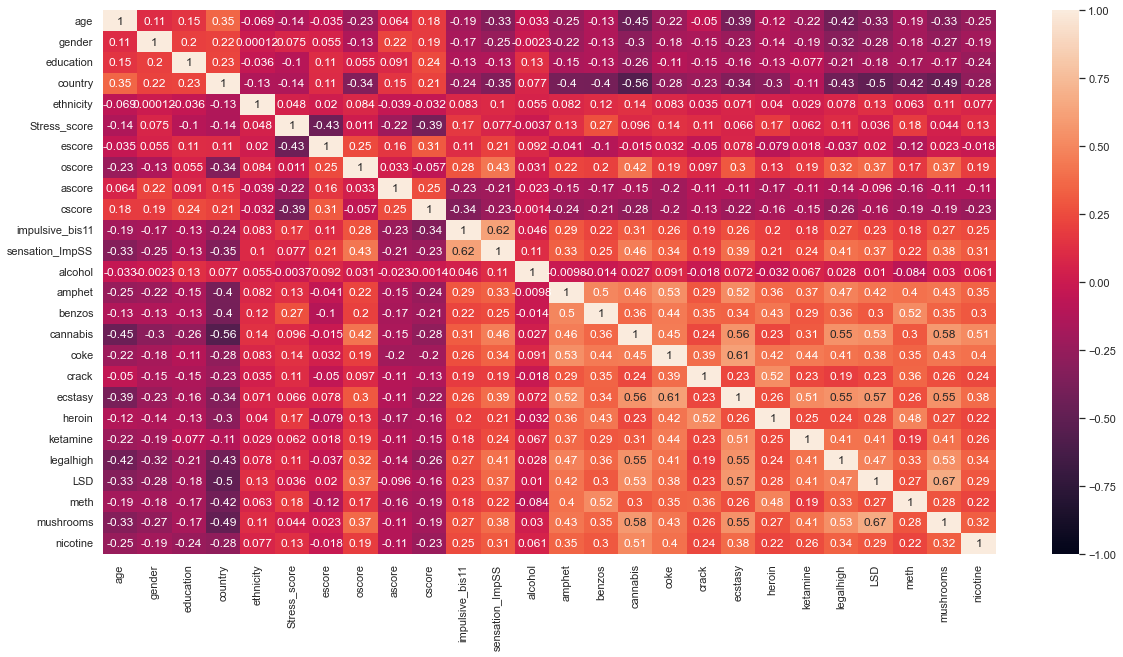

In [1667]:
corr = data_encoded.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, vmin=-1)

In [1668]:
corr.mean().sort_values(ascending= False)

coke               0.239373
ecstasy            0.236169
mushrooms          0.220903
amphet             0.219734
cannabis           0.212233
LSD                0.209265
benzos             0.204296
legalhigh          0.203302
sensation_ImpSS    0.198065
ketamine           0.192287
heroin             0.176874
oscore             0.176529
nicotine           0.174422
crack              0.164028
meth               0.163476
impulsive_bis11    0.159193
ethnicity          0.082267
alcohol            0.065577
escore             0.064019
Stress_score       0.057883
education         -0.012909
ascore            -0.020174
gender            -0.048641
cscore            -0.049073
age               -0.096147
country           -0.136667
dtype: float64

In [1669]:
# nous utilisons la valeur absolue car les coeffs de corrélation 
quantile_5pourc = ((corr.mean()).apply(np.abs)).quantile(q = 0.05) 
quantile_5pourc
# outliers sont en dessous du quartile 5%

0.027290764759308972

Cette visualisation nous permet de savoir quells variables ont le moins de corrélation avec le reste des variables et de drop ainsi, les colonnes qui ne serviront pas du tout lors de notre étude.

In [1670]:
def select_near0(column) :
    near0 = []
    for i in column.index :
        if(np.abs(column[i]) < quantile_5pourc ) :
            near0.append(i)
            
    return near0

column_drop = select_near0(corr.mean())
column_drop

['education', 'ascore']

In [1671]:
data_encoded.drop(column_drop, inplace = True, axis = 1)


In [1672]:
data_encoded

,age,gender,country,ethnicity,Stress_score,escore,oscore,cscore,impulsive_bis11,sensation_ImpSS,...,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine
ID,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,0.96082,0.12600,56.06,41.21,43.57,49.90,42.85,22.44,...,0,0,0,0,0,0,0,0,0,2
2,-0.07854,-0.48246,0.96082,-0.31685,41.35,79.61,76.26,47.94,33.79,46.57,...,3,0,4,0,2,0,2,3,0,4
3,0.49788,-0.48246,0.96082,-0.31685,44.48,62.30,39.29,35.36,21.54,62.00,...,0,0,0,0,0,0,0,0,1,0
4,-0.95197,0.48246,0.96082,-0.31685,49.20,37.69,52.70,58.44,21.54,22.44,...,2,0,0,0,2,0,0,0,0,2
5,0.49788,0.48246,0.96082,-0.31685,62.33,25.05,45.70,68.85,42.85,46.57,...,0,0,1,0,0,1,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,-0.95197,0.48246,-0.57009,-0.31685,33.69,76.59,83.54,33.58,62.97,100.00,...,0,0,0,0,0,3,3,0,0,0
1885,-0.95197,-0.48246,-0.57009,-0.31685,47.75,76.59,62.46,28.09,62.97,71.09,...,0,0,2,0,0,3,5,4,4,5
1886,-0.07854,0.48246,-0.57009,-0.31685,68.22,28.98,32.36,30.01,56.53,38.81,...,4,0,4,0,2,0,2,0,2,6


#### Nouvelles colonnes 

- Colonne : nombre de drogues prises 

In [1673]:
data['nbr_drugs'] = (data.iloc[:,12:] != 'NeverUsed').T.sum()
data_encoded['nbr_drugs'] = data['nbr_drugs']

In [1674]:
data

,age,gender,education,country,ethnicity,Stress_score,escore,oscore,ascore,cscore,...,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine,nbr_drugs
ID,,,,,,,,,,,,,,,,,,,,,
1,"[35, 45]",Female,Professional certificate/ diploma,UK,White-Asian,56.06,41.21,43.57,36.77,49.90,...,NeverUsed,NeverUsed,NeverUsed,NeverUsed,NeverUsed,NeverUsed,NeverUsed,NeverUsed,LastDecade,4
2,"[25, 34]",Male,Doctorate degree,UK,White,41.35,79.61,76.26,60.98,47.94,...,NeverUsed,LastMonth,NeverUsed,LastDecade,NeverUsed,LastDecade,LastYear,NeverUsed,LastMonth,9
3,"[35, 45]",Male,Professional certificate/ diploma,UK,White,44.48,62.30,39.29,26.61,35.36,...,NeverUsed,NeverUsed,NeverUsed,NeverUsed,NeverUsed,NeverUsed,NeverUsed,OverDecadeAgo,NeverUsed,3
4,"[18, 24]",Female,Masters degree,UK,White,49.20,37.69,52.70,58.52,58.44,...,NeverUsed,NeverUsed,NeverUsed,LastDecade,NeverUsed,NeverUsed,NeverUsed,NeverUsed,LastDecade,6
5,"[35, 45]",Female,Doctorate degree,UK,White,62.33,25.05,45.70,45.65,68.85,...,NeverUsed,OverDecadeAgo,NeverUsed,NeverUsed,OverDecadeAgo,NeverUsed,NeverUsed,LastDecade,LastDecade,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,"[18, 24]",Female,"Some college or university, no certificate or ...",USA,White,33.69,76.59,83.54,60.98,33.58,...,NeverUsed,NeverUsed,NeverUsed,NeverUsed,LastYear,LastYear,NeverUsed,NeverUsed,NeverUsed,4
1885,"[18, 24]",Male,"Some college or university, no certificate or ...",USA,White,47.75,76.59,62.46,60.98,28.09,...,NeverUsed,LastDecade,NeverUsed,NeverUsed,LastYear,LastWeek,LastMonth,LastMonth,LastWeek,8
1886,"[25, 34]",Female,University degree,USA,White,68.22,28.98,32.36,24.43,30.01,...,NeverUsed,LastMonth,NeverUsed,LastDecade,NeverUsed,LastDecade,NeverUsed,LastDecade,LastDay,10


- Colonne : profil selon ses scores 

In [1675]:
data['communicative_score'] = ((data_encoded.escore + data_encoded.oscore)/2)
data_encoded['communicative_score'] = data['communicative_score']

data['impulsive_score'] = ((data_encoded['impulsive_bis11'] + data_encoded['sensation_ImpSS']/2))
data_encoded['impulsive_score'] = data['impulsive_score']

del data_encoded['escore']
del data_encoded['oscore']
del data_encoded['impulsive_bis11']
del data_encoded['sensation_ImpSS']

data_encoded

,age,gender,country,ethnicity,Stress_score,cscore,alcohol,amphet,benzos,cannabis,...,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine,nbr_drugs,communicative_score,impulsive_score
ID,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,0.96082,0.12600,56.06,49.90,5,2,2,0,...,0,0,0,0,0,0,2,4,42.390,54.070
2,-0.07854,-0.48246,0.96082,-0.31685,41.35,47.94,5,2,0,4,...,0,2,0,2,3,0,4,9,77.935,57.075
3,0.49788,-0.48246,0.96082,-0.31685,44.48,35.36,6,0,0,3,...,0,0,0,0,0,1,0,3,50.795,52.540
4,-0.95197,0.48246,0.96082,-0.31685,49.20,58.44,4,0,3,2,...,0,2,0,0,0,0,2,6,45.195,32.760
5,0.49788,0.48246,0.96082,-0.31685,62.33,68.85,4,1,0,3,...,0,0,1,0,0,2,2,7,35.375,66.135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,-0.95197,0.48246,-0.57009,-0.31685,33.69,33.58,5,0,0,5,...,0,0,3,3,0,0,0,4,80.065,112.970
1885,-0.95197,-0.48246,-0.57009,-0.31685,47.75,28.09,5,0,0,3,...,0,0,3,5,4,4,5,8,69.525,98.515
1886,-0.07854,0.48246,-0.57009,-0.31685,68.22,30.01,4,6,5,6,...,0,2,0,2,0,2,6,10,30.670,75.935


In [1676]:
data_encoded

,age,gender,country,ethnicity,Stress_score,cscore,alcohol,amphet,benzos,cannabis,...,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine,nbr_drugs,communicative_score,impulsive_score
ID,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,0.96082,0.12600,56.06,49.90,5,2,2,0,...,0,0,0,0,0,0,2,4,42.390,54.070
2,-0.07854,-0.48246,0.96082,-0.31685,41.35,47.94,5,2,0,4,...,0,2,0,2,3,0,4,9,77.935,57.075
3,0.49788,-0.48246,0.96082,-0.31685,44.48,35.36,6,0,0,3,...,0,0,0,0,0,1,0,3,50.795,52.540
4,-0.95197,0.48246,0.96082,-0.31685,49.20,58.44,4,0,3,2,...,0,2,0,0,0,0,2,6,45.195,32.760
5,0.49788,0.48246,0.96082,-0.31685,62.33,68.85,4,1,0,3,...,0,0,1,0,0,2,2,7,35.375,66.135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,-0.95197,0.48246,-0.57009,-0.31685,33.69,33.58,5,0,0,5,...,0,0,3,3,0,0,0,4,80.065,112.970
1885,-0.95197,-0.48246,-0.57009,-0.31685,47.75,28.09,5,0,0,3,...,0,0,3,5,4,4,5,8,69.525,98.515
1886,-0.07854,0.48246,-0.57009,-0.31685,68.22,30.01,4,6,5,6,...,0,2,0,2,0,2,6,10,30.670,75.935


In [1677]:
profil_encoded = data_encoded.iloc[:,0:4]
profil_encoded['nbr_drugs'] = data_encoded['nbr_drugs']

perso_encoded = pd.DataFrame(data_encoded.iloc[:,4:6])
perso_encoded['communicative_score'] = data_encoded['communicative_score']
perso_encoded['impulsive_score'] = data_encoded['impulsive_score']

drugs_encoded = data_encoded.iloc[:,6:20]

In [1678]:
drugs_encoded

,alcohol,amphet,benzos,cannabis,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine
ID,,,,,,,,,,,,,,
1,5,2,2,0,0,0,0,0,0,0,0,0,0,2
2,5,2,0,4,3,0,4,0,2,0,2,3,0,4
3,6,0,0,3,0,0,0,0,0,0,0,0,1,0
4,4,0,3,2,2,0,0,0,2,0,0,0,0,2
5,4,1,0,3,0,0,1,0,0,1,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,5,0,0,5,0,0,0,0,0,3,3,0,0,0
1885,5,0,0,3,0,0,2,0,0,3,5,4,4,5
1886,4,6,5,6,4,0,4,0,2,0,2,0,2,6


In [1679]:
data

,age,gender,education,country,ethnicity,Stress_score,escore,oscore,ascore,cscore,...,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine,nbr_drugs,communicative_score,impulsive_score
ID,,,,,,,,,,,,,,,,,,,,,
1,"[35, 45]",Female,Professional certificate/ diploma,UK,White-Asian,56.06,41.21,43.57,36.77,49.90,...,NeverUsed,NeverUsed,NeverUsed,NeverUsed,NeverUsed,NeverUsed,LastDecade,4,42.390,54.070
2,"[25, 34]",Male,Doctorate degree,UK,White,41.35,79.61,76.26,60.98,47.94,...,NeverUsed,LastDecade,NeverUsed,LastDecade,LastYear,NeverUsed,LastMonth,9,77.935,57.075
3,"[35, 45]",Male,Professional certificate/ diploma,UK,White,44.48,62.30,39.29,26.61,35.36,...,NeverUsed,NeverUsed,NeverUsed,NeverUsed,NeverUsed,OverDecadeAgo,NeverUsed,3,50.795,52.540
4,"[18, 24]",Female,Masters degree,UK,White,49.20,37.69,52.70,58.52,58.44,...,NeverUsed,LastDecade,NeverUsed,NeverUsed,NeverUsed,NeverUsed,LastDecade,6,45.195,32.760
5,"[35, 45]",Female,Doctorate degree,UK,White,62.33,25.05,45.70,45.65,68.85,...,NeverUsed,NeverUsed,OverDecadeAgo,NeverUsed,NeverUsed,LastDecade,LastDecade,7,35.375,66.135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,"[18, 24]",Female,"Some college or university, no certificate or ...",USA,White,33.69,76.59,83.54,60.98,33.58,...,NeverUsed,NeverUsed,LastYear,LastYear,NeverUsed,NeverUsed,NeverUsed,4,80.065,112.970
1885,"[18, 24]",Male,"Some college or university, no certificate or ...",USA,White,47.75,76.59,62.46,60.98,28.09,...,NeverUsed,NeverUsed,LastYear,LastWeek,LastMonth,LastMonth,LastWeek,8,69.525,98.515
1886,"[25, 34]",Female,University degree,USA,White,68.22,28.98,32.36,24.43,30.01,...,NeverUsed,LastDecade,NeverUsed,LastDecade,NeverUsed,LastDecade,LastDay,10,30.670,75.935


---

## <p style = 'text-align: center;'>Visualisation</p> 

---

Nous allons utilisé la dataframe nommé 'data' pour la visualisation 

Legitimité de notre DataSet ? 
- Proportion des jeunes dans notre échantillon 

In [1680]:
'''testtest = data.groupby(by = "age").count().reset_index()
testtest
plt.bar(testtest["age"], testtest["ID"])'''

'testtest = data.groupby(by = "age").count().reset_index()\ntesttest\nplt.bar(testtest["age"], testtest["ID"])'

In [1681]:
data

,age,gender,education,country,ethnicity,Stress_score,escore,oscore,ascore,cscore,...,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine,nbr_drugs,communicative_score,impulsive_score
ID,,,,,,,,,,,,,,,,,,,,,
1,"[35, 45]",Female,Professional certificate/ diploma,UK,White-Asian,56.06,41.21,43.57,36.77,49.90,...,NeverUsed,NeverUsed,NeverUsed,NeverUsed,NeverUsed,NeverUsed,LastDecade,4,42.390,54.070
2,"[25, 34]",Male,Doctorate degree,UK,White,41.35,79.61,76.26,60.98,47.94,...,NeverUsed,LastDecade,NeverUsed,LastDecade,LastYear,NeverUsed,LastMonth,9,77.935,57.075
3,"[35, 45]",Male,Professional certificate/ diploma,UK,White,44.48,62.30,39.29,26.61,35.36,...,NeverUsed,NeverUsed,NeverUsed,NeverUsed,NeverUsed,OverDecadeAgo,NeverUsed,3,50.795,52.540
4,"[18, 24]",Female,Masters degree,UK,White,49.20,37.69,52.70,58.52,58.44,...,NeverUsed,LastDecade,NeverUsed,NeverUsed,NeverUsed,NeverUsed,LastDecade,6,45.195,32.760
5,"[35, 45]",Female,Doctorate degree,UK,White,62.33,25.05,45.70,45.65,68.85,...,NeverUsed,NeverUsed,OverDecadeAgo,NeverUsed,NeverUsed,LastDecade,LastDecade,7,35.375,66.135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,"[18, 24]",Female,"Some college or university, no certificate or ...",USA,White,33.69,76.59,83.54,60.98,33.58,...,NeverUsed,NeverUsed,LastYear,LastYear,NeverUsed,NeverUsed,NeverUsed,4,80.065,112.970
1885,"[18, 24]",Male,"Some college or university, no certificate or ...",USA,White,47.75,76.59,62.46,60.98,28.09,...,NeverUsed,NeverUsed,LastYear,LastWeek,LastMonth,LastMonth,LastWeek,8,69.525,98.515
1886,"[25, 34]",Female,University degree,USA,White,68.22,28.98,32.36,24.43,30.01,...,NeverUsed,LastDecade,NeverUsed,LastDecade,NeverUsed,LastDecade,LastDay,10,30.670,75.935


In [1682]:
my_list = [1, 2, 3, 4, 5]
','.join(list(map(str,my_list)))

'1,2,3,4,5'

In [1683]:
def join_(x) :
    return '-'.join(map(str, x))
    

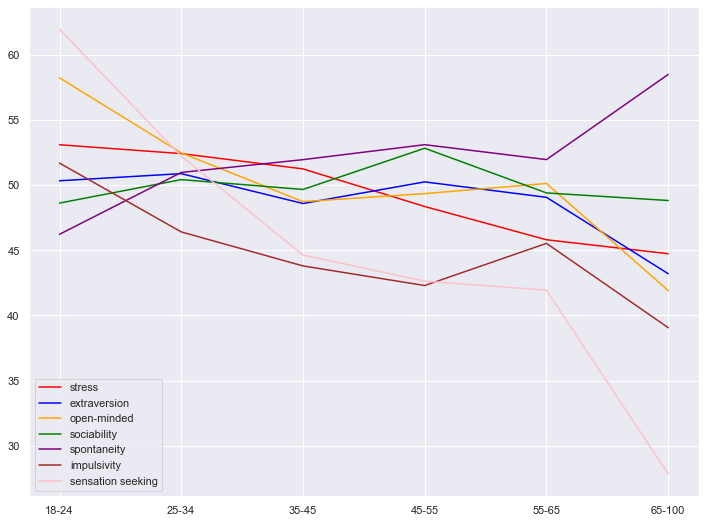

In [1684]:

data['age_str'] = data['age'].apply(join_)

df_for_plot = data.groupby(by = "age_str").mean().reset_index()
df_for_plot

plt.plot(df_for_plot["age_str"], df_for_plot["Stress_score"], label = "stress", c = "red")
plt.plot(df_for_plot["age_str"], df_for_plot["escore"], label = "extraversion", c = "blue")
plt.plot(df_for_plot["age_str"], df_for_plot["oscore"], label = "open-minded", c = "orange")
plt.plot(df_for_plot["age_str"], df_for_plot["ascore"], label = "sociability", c = "green")
plt.plot(df_for_plot["age_str"], df_for_plot["cscore"], label = "spontaneity", c = "purple")
plt.plot(df_for_plot["age_str"], df_for_plot["impulsive_bis11"], label = "impulsivity", c = "brown")
plt.plot(df_for_plot["age_str"], df_for_plot["sensation_ImpSS"], label = "sensation seeking", c = "pink")

plt.legend()





---

## <p style = 'text-align: center;'>Models</p> 

---

Nous allons utilisé la dataframe nommé 'data_encoded' pour la mise en place de modeles de ML  

Nous allons nous concentrer dans cette partie en premier lieu sur une target principale puis sur l'ensemble des targets :

- <font color = green>Target_cannabis</font> : Frequence de consommation du cannabis car nous avons pu voir dans la matrice de corrélation et dans les visualisations que le cannabis est l'une des drogues les plus corrélées (0.21 en moyenne contre 0.23 pour la drogue la plus corrélée ) avec le reste des variables et a une fréquence d'utilisation plutôt élevé chez les jeunes (partie description : fréquence de CL6 = 41%)
- <font color = green>Target_all</font> = drugs_encoded

In [1685]:
target_cannabis = drugs_encoded['cannabis']
target_all = drugs_encoded

Health : Polyconsommation VS Consommation (quelle pondération ? )


I. Describing the encoded data

In [1686]:
data.head()

,age,gender,education,country,ethnicity,Stress_score,escore,oscore,ascore,cscore,...,ketamine,legalhigh,LSD,meth,mushrooms,nicotine,nbr_drugs,communicative_score,impulsive_score,age_str
ID,,,,,,,,,,,,,,,,,,,,,
1,"[35, 45]",Female,Professional certificate/ diploma,UK,White-Asian,56.06,41.21,43.57,36.77,49.90,...,NeverUsed,NeverUsed,NeverUsed,NeverUsed,NeverUsed,LastDecade,4,42.390,54.070,35-45
2,"[25, 34]",Male,Doctorate degree,UK,White,41.35,79.61,76.26,60.98,47.94,...,LastDecade,NeverUsed,LastDecade,LastYear,NeverUsed,LastMonth,9,77.935,57.075,25-34
3,"[35, 45]",Male,Professional certificate/ diploma,UK,White,44.48,62.30,39.29,26.61,35.36,...,NeverUsed,NeverUsed,NeverUsed,NeverUsed,OverDecadeAgo,NeverUsed,3,50.795,52.540,35-45
4,"[18, 24]",Female,Masters degree,UK,White,49.20,37.69,52.70,58.52,58.44,...,LastDecade,NeverUsed,NeverUsed,NeverUsed,NeverUsed,LastDecade,6,45.195,32.760,18-24
5,"[35, 45]",Female,Doctorate degree,UK,White,62.33,25.05,45.70,45.65,68.85,...,NeverUsed,OverDecadeAgo,NeverUsed,NeverUsed,LastDecade,LastDecade,7,35.375,66.135,35-45


In [1687]:
data_encoded.head()

,age,gender,country,ethnicity,Stress_score,cscore,alcohol,amphet,benzos,cannabis,...,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine,nbr_drugs,communicative_score,impulsive_score
ID,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,0.96082,0.12600,56.06,49.90,5,2,2,0,...,0,0,0,0,0,0,2,4,42.390,54.070
2,-0.07854,-0.48246,0.96082,-0.31685,41.35,47.94,5,2,0,4,...,0,2,0,2,3,0,4,9,77.935,57.075
3,0.49788,-0.48246,0.96082,-0.31685,44.48,35.36,6,0,0,3,...,0,0,0,0,0,1,0,3,50.795,52.540
4,-0.95197,0.48246,0.96082,-0.31685,49.20,58.44,4,0,3,2,...,0,2,0,0,0,0,2,6,45.195,32.760
5,0.49788,0.48246,0.96082,-0.31685,62.33,68.85,4,1,0,3,...,0,0,1,0,0,2,2,7,35.375,66.135


In [1688]:
profil_encoded.describe()

,age,gender,country,ethnicity,nbr_drugs
count,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000
mean,0.043056,0.000258,0.357905,-0.309746,6.450508
std,0.877335,0.482589,0.700353,0.166646,3.893983
min,-0.951970,-0.482460,-0.570090,-1.107020,0.000000
25%,-0.951970,-0.482460,-0.570090,-0.316850,3.000000
50%,-0.078540,0.482460,0.960820,-0.316850,6.000000
75%,0.497880,0.482460,0.960820,-0.316850,10.000000
max,2.591710,0.482460,0.960820,1.907250,14.000000


In [1689]:
perso_encoded.describe()

,Stress_score,cscore,communicative_score,impulsive_score
count,1869.000000,1869.000000,1869.000000,1869.000000
mean,51.397303,50.038234,51.506263,72.834535
std,14.827721,14.398866,12.378719,26.757209
min,0.000000,0.000000,12.210000,0.000000
25%,41.350000,40.580000,43.425000,53.195000
50%,52.040000,49.900000,51.210000,73.645000
75%,60.760000,58.440000,59.770000,92.075000
max,100.000000,100.000000,94.650000,150.000000


In [1690]:
drugs_encoded.describe()

,alcohol,amphet,benzos,cannabis,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine
count,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000
mean,4.639379,1.336009,1.460674,2.981273,1.155163,0.295880,1.310861,0.372392,0.569823,1.351525,1.065276,0.815944,1.187801,3.194222
std,1.328114,1.782467,1.863713,2.286534,1.507121,0.835949,1.646551,1.034940,1.221712,1.790118,1.493031,1.636489,1.466814,2.414546
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,5.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,6.000000,2.000000,3.000000,5.000000,2.000000,0.000000,3.000000,0.000000,0.000000,3.000000,2.000000,0.000000,2.000000,6.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [1691]:
target_cannabis.describe()

count    1869.000000
mean        2.981273
std         2.286534
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max         6.000000
Name: cannabis, dtype: float64

### Final parts of the pre-processing before the modeling

- Encoding (To be done for certain columns)
- Split the data into training and test set
- Normalization (To be done for certain columns)
- Imputation (No need because no N/A and no incoherent values)
- Selection (we will see)

Before normalizing our data, we need to ensure that every column is encoded.

In [1692]:
data_encoded.dtypes

age                    float64
gender                 float64
country                float64
ethnicity              float64
Stress_score           float64
cscore                 float64
alcohol                  int64
amphet                   int64
benzos                   int64
cannabis                 int64
coke                     int64
crack                    int64
ecstasy                  int64
heroin                   int64
ketamine                 int64
legalhigh                int64
LSD                      int64
meth                     int64
mushrooms                int64
nicotine                 int64
nbr_drugs                int64
communicative_score    float64
impulsive_score        float64
dtype: object

On peut se dire qu'avec nos colonnes numériques, tout a été déjà encodé. <br>
Toutefois, certaines colonnes catégoriques ont été quantifiées de façon ordinale : country ( pourquoi numériquement, un pays serait plus grand que l'autre ? ), ethnicity et genre. Et la colonne Age a été quandtifiée mais on ne sait pas de quelle manière.

Pour la colonne age qui contient des intervalles d'age, nous allons chercher à simuler une ditribution gaussienne pour chaque intervalle afin d'avoir une variété d'âge qui est représentative d'une population normale 

In [1693]:
def gauss(x) :
    mean = np.mean(list(range(x[0]-1,x[1])))
    sigma = np.std(list(range(x[0]-1,x[1])))

    return round(int(np.random.normal(mean,sigma,1)),2)

In [1694]:
data_encoded['age'] = data['age'].apply(gauss) 

In [1695]:
data_encoded['age']

ID
1       40
2       32
3       38
4       18
5       42
        ..
1884    25
1885    21
1886    26
1887    16
1888    19
Name: age, Length: 1869, dtype: int64

One hot encoding pour les variables catégoriques :

In [1696]:
data.ethnicity

ID
1       White-Asian
2             White
3             White
4             White
5             White
           ...     
1884          White
1885          White
1886          White
1887          White
1888          White
Name: ethnicity, Length: 1869, dtype: object

In [1697]:
# on va remplacer les colonnes quantifiées par leurs valeurs
data_encoded['country'] = data.country
data_encoded['ethnicity'] = data.ethnicity
data_encoded['gender'] = data.gender

# we replace every interval with its mean value


data_encoded['age'] = data['age'].apply(gauss) 
# on simule une distribution gaussienne standart de l'age 
# par le biais du np.random.randn()


In [1698]:
countries = pd.get_dummies(data_encoded.country, prefix = 'Country')
countries

,Country_Australia,Country_Canada,Country_New Zealand,Country_Other,Country_Republic of Ireland,Country_UK,Country_USA
ID,,,,,,,
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
5,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
1884,0,0,0,0,0,0,1
1885,0,0,0,0,0,0,1
1886,0,0,0,0,0,0,1


In [1699]:
countries.sum(axis = 0)

Country_Australia                54
Country_Canada                   86
Country_New Zealand               5
Country_Other                   114
Country_Republic of Ireland      19
Country_UK                     1039
Country_USA                     552
dtype: int64

In [1700]:
countries.drop(['Country_New Zealand','Country_Republic of Ireland'],axis = 1, inplace = True)

In [1701]:
countries.sum(axis = 0)

Country_Australia      54
Country_Canada         86
Country_Other         114
Country_UK           1039
Country_USA           552
dtype: int64

In [1702]:
ethnicities = pd.get_dummies(data_encoded.ethnicity, prefix = 'Ethnicity')
ethnicities

,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Black-Asian,Ethnicity_Other,Ethnicity_White,Ethnicity_White-Asian,Ethnicity_White-Black
ID,,,,,,,
1,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0
5,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
1884,0,0,0,0,1,0,0
1885,0,0,0,0,1,0,0
1886,0,0,0,0,1,0,0


In [1703]:
ethnicities.sum()

Ethnicity_Asian            26
Ethnicity_Black            33
Ethnicity_Black-Asian       3
Ethnicity_Other            62
Ethnicity_White          1705
Ethnicity_White-Asian      20
Ethnicity_White-Black      20
dtype: int64

In [1704]:
ethnicities.drop(['Ethnicity_Black-Asian'],axis = 1, inplace = True)

In [1705]:
ethnicities.sum()

Ethnicity_Asian            26
Ethnicity_Black            33
Ethnicity_Other            62
Ethnicity_White          1705
Ethnicity_White-Asian      20
Ethnicity_White-Black      20
dtype: int64

In [1706]:
del data_encoded['country']
del data_encoded['ethnicity']

In [1707]:
encode_dict_genre = {'Male' : 0,
                     'Female' : 1}

data_encoded['gender'] = data_encoded['gender'].map(encode_dict_genre)

In [1708]:
data_encoded = pd.merge(data_encoded,countries,left_index=True, right_index=True)

In [1709]:
data_encoded = pd.merge(data_encoded,ethnicities,left_index = True, right_index = True)

In [1710]:
# our dataframe is now completely encoded
data_encoded

,age,gender,Stress_score,cscore,alcohol,amphet,benzos,cannabis,coke,crack,...,Country_Canada,Country_Other,Country_UK,Country_USA,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Other,Ethnicity_White,Ethnicity_White-Asian,Ethnicity_White-Black
ID,,,,,,,,,,,,,,,,,,,,,
1,43,1,56.06,49.90,5,2,2,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,29,0,41.35,47.94,5,2,0,4,3,0,...,0,0,1,0,0,0,0,1,0,0
3,35,0,44.48,35.36,6,0,0,3,0,0,...,0,0,1,0,0,0,0,1,0,0
4,19,1,49.20,58.44,4,0,3,2,2,0,...,0,0,1,0,0,0,0,1,0,0
5,35,1,62.33,68.85,4,1,0,3,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,20,1,33.69,33.58,5,0,0,5,0,0,...,0,0,0,1,0,0,0,1,0,0
1885,19,0,47.75,28.09,5,0,0,3,0,0,...,0,0,0,1,0,0,0,1,0,0
1886,29,1,68.22,30.01,4,6,5,6,4,0,...,0,0,0,1,0,0,0,1,0,0


In [1711]:
data_encoded.columns

Index(['age', 'gender', 'Stress_score', 'cscore', 'alcohol', 'amphet',
       'benzos', 'cannabis', 'coke', 'crack', 'ecstasy', 'heroin', 'ketamine',
       'legalhigh', 'LSD', 'meth', 'mushrooms', 'nicotine', 'nbr_drugs',
       'communicative_score', 'impulsive_score', 'Country_Australia',
       'Country_Canada', 'Country_Other', 'Country_UK', 'Country_USA',
       'Ethnicity_Asian', 'Ethnicity_Black', 'Ethnicity_Other',
       'Ethnicity_White', 'Ethnicity_White-Asian', 'Ethnicity_White-Black'],
      dtype='object')

In [1712]:
drugs.columns

Index(['alcohol', 'amphet', 'benzos', 'cannabis', 'coke', 'crack', 'ecstasy',
       'heroin', 'ketamine', 'legalhigh', 'LSD', 'meth', 'mushrooms',
       'nicotine'],
      dtype='object')

In [1713]:
drugs_encoded['nbr_drugs'] = data_encoded.nbr_drugs

Fin de la partie 'Encoding'

In [1714]:
data_encoded

,age,gender,Stress_score,cscore,alcohol,amphet,benzos,cannabis,coke,crack,...,Country_Canada,Country_Other,Country_UK,Country_USA,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Other,Ethnicity_White,Ethnicity_White-Asian,Ethnicity_White-Black
ID,,,,,,,,,,,,,,,,,,,,,
1,43,1,56.06,49.90,5,2,2,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,29,0,41.35,47.94,5,2,0,4,3,0,...,0,0,1,0,0,0,0,1,0,0
3,35,0,44.48,35.36,6,0,0,3,0,0,...,0,0,1,0,0,0,0,1,0,0
4,19,1,49.20,58.44,4,0,3,2,2,0,...,0,0,1,0,0,0,0,1,0,0
5,35,1,62.33,68.85,4,1,0,3,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,20,1,33.69,33.58,5,0,0,5,0,0,...,0,0,0,1,0,0,0,1,0,0
1885,19,0,47.75,28.09,5,0,0,3,0,0,...,0,0,0,1,0,0,0,1,0,0
1886,29,1,68.22,30.01,4,6,5,6,4,0,...,0,0,0,1,0,0,0,1,0,0


In [1715]:
continuous_vars = list(perso_encoded.columns)
continuous_vars.extend(['age'])

labels_vars = list(drugs_encoded.columns)
labels_vars.extend( list(ethnicities.columns))
labels_vars.extend( list(countries.columns))

Now we are going to split our data

In [1716]:
drugs_encoded

,alcohol,amphet,benzos,cannabis,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine,nbr_drugs
ID,,,,,,,,,,,,,,,
1,5,2,2,0,0,0,0,0,0,0,0,0,0,2,4
2,5,2,0,4,3,0,4,0,2,0,2,3,0,4,9
3,6,0,0,3,0,0,0,0,0,0,0,0,1,0,3
4,4,0,3,2,2,0,0,0,2,0,0,0,0,2,6
5,4,1,0,3,0,0,1,0,0,1,0,0,2,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,5,0,0,5,0,0,0,0,0,3,3,0,0,0,4
1885,5,0,0,3,0,0,2,0,0,3,5,4,4,5,8
1886,4,6,5,6,4,0,4,0,2,0,2,0,2,6,10


In [1717]:

X = data_encoded.drop(drugs_encoded.columns,axis = 1)
Y = drugs_encoded


X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)


Now we are going to normalize our data to prepare it for the ML models.

In [1718]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), 
                           index=X_train.index, 
                           columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), 
                          index=X_test.index, 
                          columns=X_test.columns)

In [1719]:
X_train.head()

,age,gender,Stress_score,cscore,communicative_score,impulsive_score,Country_Australia,Country_Canada,Country_Other,Country_UK,Country_USA,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Other,Ethnicity_White,Ethnicity_White-Asian,Ethnicity_White-Black
ID,,,,,,,,,,,,,,,,,
209,0.825215,1.004598,0.153143,-0.003387,-0.142389,0.945881,-0.177611,-0.223068,-0.255238,0.899516,-0.641095,-0.114752,-0.142411,-0.175308,0.304519,-0.104015,-0.100193
1304,0.441776,-0.995423,-0.033874,0.419861,-1.017137,-1.965289,5.630275,-0.223068,-0.255238,-1.111709,-0.641095,-0.114752,-0.142411,-0.175308,0.304519,-0.104015,-0.100193
1626,0.288400,1.004598,-0.769205,0.762623,-0.661130,-1.537086,-0.177611,-0.223068,-0.255238,0.899516,-0.641095,-0.114752,-0.142411,-0.175308,0.304519,-0.104015,-0.100193
59,0.748527,-0.995423,0.240954,-0.403044,0.349832,1.877853,-0.177611,-0.223068,-0.255238,0.899516,-0.641095,-0.114752,-0.142411,-0.175308,0.304519,-0.104015,-0.100193
1502,-1.091981,1.004598,0.644481,-0.003387,0.453500,1.190705,-0.177611,-0.223068,-0.255238,-1.111709,1.559830,-0.114752,-0.142411,-0.175308,0.304519,-0.104015,-0.100193


In [1720]:
print('Train set:', X_train.shape, Y_train.shape)
print('Test set:', X_test.shape, Y_test.shape)

Train set: (1308, 17) (1308, 15)
Test set: (561, 17) (561, 15)


In [1721]:
def plot_confusion_matrix(y,y_predict):
    #Function to easily plot confusion matrix
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Blues');
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['non-user', 'user']); ax.yaxis.set_ticklabels(['non-user', 'user'])



### Unsupervised Learning or how to cluster the different types of consumers

---

#### <p style = 'text-align: center;'>Analyse des composantes principales</p>


Avoir nos composantes principales sous la main nous permets de mieux catégoriser nos individus et nous aideront ainsi à augmenter plus tard l'accuracy de nos modèles de prédiction.

#### *Target = cannabis*

En premier, nous devons faire quelques observations à l'aide de l'ACP :
- individus actifs : lignes dans le dataset
- variables actives ( variables quantitatives): les variables perso, la variable age et le nombre de drogues déjà consommé 
- variables supps : toutes vars qui sont catégoriques

In [1722]:
var_actives = list(perso_encoded.columns)
var_actives.extend(['age'])
var_actives

['Stress_score', 'cscore', 'communicative_score', 'impulsive_score', 'age']

In [1723]:
var_labels = list(drugs_encoded.columns)
var_labels.extend( list(ethnicities.columns))
var_labels.extend( list(countries.columns))
var_labels 


['alcohol',
 'amphet',
 'benzos',
 'cannabis',
 'coke',
 'crack',
 'ecstasy',
 'heroin',
 'ketamine',
 'legalhigh',
 'LSD',
 'meth',
 'mushrooms',
 'nicotine',
 'nbr_drugs',
 'Ethnicity_Asian',
 'Ethnicity_Black',
 'Ethnicity_Other',
 'Ethnicity_White',
 'Ethnicity_White-Asian',
 'Ethnicity_White-Black',
 'Country_Australia',
 'Country_Canada',
 'Country_Other',
 'Country_UK',
 'Country_USA']

In [1724]:
ind_actifs_quant = data_encoded.loc[data_encoded.index,var_actives]

ind_actifs_labels = data_encoded.loc[data_encoded.index,var_labels]



On normalise les variables quantitatives afin de mettre l'ensemble des colonnes à la même échelle.

In [1725]:
scaler_actifs_quant = StandardScaler()
scaler_actifs_quant.fit(ind_actifs_quant)


ind_actifs_quant = pd.DataFrame(scaler_actifs_quant.transform(ind_actifs_quant), 
                           index=ind_actifs_quant.index, 
                           columns=ind_actifs_quant.columns)


In [1726]:
display(ind_actifs_quant)

,Stress_score,cscore,communicative_score,impulsive_score,age
ID,,,,,
1,0.314542,-0.009603,-0.736643,-0.701477,0.807229
2,-0.677784,-0.145761,2.135585,-0.589140,-0.260993
3,-0.466636,-1.019675,-0.057474,-0.758673,0.196816
4,-0.148229,0.583658,-0.509984,-1.498111,-1.024009
5,0.737512,1.306825,-1.303493,-0.250449,0.196816
...,...,...,...,...,...
1884,-1.194522,-1.143329,2.307701,1.500388,-0.947707
1885,-0.246045,-1.524711,1.456012,0.960016,-1.024009
1886,1.134847,-1.391331,-1.683683,0.115905,-0.260993


In [1727]:
display(ind_actifs_labels)

,alcohol,amphet,benzos,cannabis,coke,crack,ecstasy,heroin,ketamine,legalhigh,...,Ethnicity_Black,Ethnicity_Other,Ethnicity_White,Ethnicity_White-Asian,Ethnicity_White-Black,Country_Australia,Country_Canada,Country_Other,Country_UK,Country_USA
ID,,,,,,,,,,,,,,,,,,,,,
1,5,2,2,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,5,2,0,4,3,0,4,0,2,0,...,0,0,1,0,0,0,0,0,1,0
3,6,0,0,3,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,4,0,3,2,2,0,0,0,2,0,...,0,0,1,0,0,0,0,0,1,0
5,4,1,0,3,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,5,0,0,5,0,0,0,0,0,3,...,0,0,1,0,0,0,0,0,0,1
1885,5,0,0,3,0,0,2,0,0,3,...,0,0,1,0,0,0,0,0,0,1
1886,4,6,5,6,4,0,4,0,2,0,...,0,0,1,0,0,0,0,0,0,1


In [1728]:
X.columns

Index(['age', 'gender', 'Stress_score', 'cscore', 'communicative_score',
       'impulsive_score', 'Country_Australia', 'Country_Canada',
       'Country_Other', 'Country_UK', 'Country_USA', 'Ethnicity_Asian',
       'Ethnicity_Black', 'Ethnicity_Other', 'Ethnicity_White',
       'Ethnicity_White-Asian', 'Ethnicity_White-Black'],
      dtype='object')

Text(0.5, 0.98, 'Matrice de correlation des variables quantitatives de notre dataset')

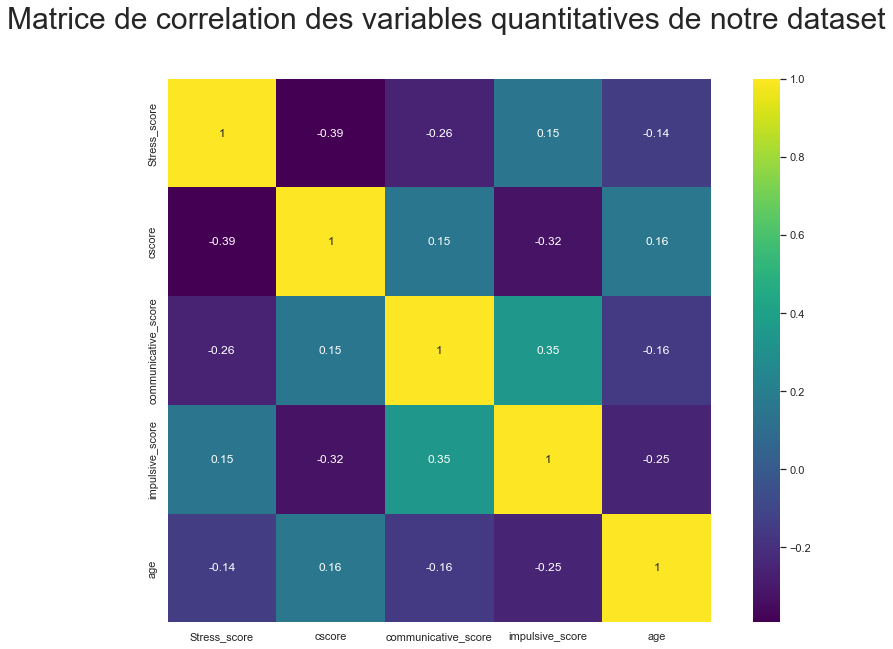

In [1729]:
correlation = ind_actifs_quant.corr()
fig = plt.figure(figsize = (15,10))
sns.heatmap(correlation,vmax = 1, square = True, annot = True, cmap = 'viridis')

fig.suptitle('Matrice de correlation des variables quantitatives de notre dataset',fontsize = 30)

In [1730]:
pca = PCA()
pd.DataFrame(pca.fit_transform(ind_actifs_quant))

,0,1,2,3,4
0,0.576768,1.160096,0.284107,-0.131101,-0.094724
1,0.338766,-1.648322,-0.033557,0.070926,-1.618234
2,0.119278,0.445245,0.196225,0.952412,-0.846786
3,0.786381,0.491494,-1.705109,0.181249,-0.339755
4,0.667380,1.093335,-0.569448,-0.955799,1.083362
...,...,...,...,...,...
1864,-1.362762,-2.749807,0.552196,0.992252,-0.707698
1865,-1.745247,-1.434170,0.198818,0.779275,-0.852026
1866,-1.427440,1.946462,-0.094726,0.455079,0.312493
1867,-3.016150,0.936248,0.319805,1.160380,0.297615


In [1731]:
corr_df = pd.DataFrame(pca.get_covariance(), index = ind_actifs_quant.columns, columns = ind_actifs_quant.columns )
corr_df

,Stress_score,cscore,communicative_score,impulsive_score,age
Stress_score,1.000535,-0.392270,-0.260649,0.147324,-0.143192
cscore,-0.392270,1.000535,0.154102,-0.324046,0.158512
communicative_score,-0.260649,0.154102,1.000535,0.349556,-0.159347
impulsive_score,0.147324,-0.324046,0.349556,1.000535,-0.254044
age,-0.143192,0.158512,-0.159347,-0.254044,1.000535


In [1732]:
inertie = pca.explained_variance_ratio_
inertie


array([0.34495693, 0.28996176, 0.16190948, 0.11608728, 0.08708455])

Choisissons le nombre de composantes principales à conserver sur les 6 existantes.
Observons le scree plot :

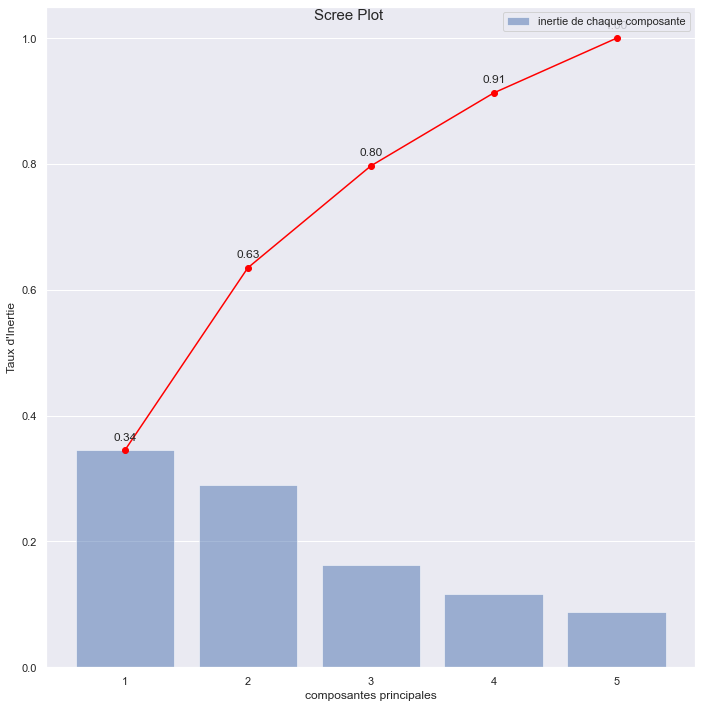

In [1733]:
fig = plt.figure(figsize = (10,10))

plt.bar(range(1,6),inertie,alpha = 0.5,align = 'center',label = 'inertie de chaque composante')

    
plt.xlabel('composantes principales')
plt.ylabel('Taux d\'Inertie')
plt.legend(loc = 'best')
plt.tight_layout()
fig.suptitle('Scree Plot', fontsize = 15)
plt.plot(range(1,6),np.cumsum(pca.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance",
         marker = 'o')

for x,y in zip(range(1,6),np.cumsum(pca.explained_variance_ratio_)):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.grid(axis = 'x')
        

On peut prendre les 3 premières composantes qui peuvent représenter 80% de l'information. Toutefois par soucis de qualité, nous allons continuer notre analyse avec 4 compsantes principales qui nous donnet 91% d'informations.

In [1734]:
#px.bar(x = range(1,7),y = inertie)

In [1735]:
ind_actifs_quant

,Stress_score,cscore,communicative_score,impulsive_score,age
ID,,,,,
1,0.314542,-0.009603,-0.736643,-0.701477,0.807229
2,-0.677784,-0.145761,2.135585,-0.589140,-0.260993
3,-0.466636,-1.019675,-0.057474,-0.758673,0.196816
4,-0.148229,0.583658,-0.509984,-1.498111,-1.024009
5,0.737512,1.306825,-1.303493,-0.250449,0.196816
...,...,...,...,...,...
1884,-1.194522,-1.143329,2.307701,1.500388,-0.947707
1885,-0.246045,-1.524711,1.456012,0.960016,-1.024009
1886,1.134847,-1.391331,-1.683683,0.115905,-0.260993


In [1736]:
pca = PCA(n_components = 4)
pca.fit_transform(ind_actifs_quant)
components_names = ['PC1','PC2','PC3','PC4']
pd.DataFrame(pca.components_, index = components_names).T

# we can see the eigenvector of each component

,PC1,PC2,PC3,PC4
0,-0.479380,0.427574,-0.060950,-0.749382
1,0.571872,-0.247691,-0.298948,-0.570747
2,-0.047635,-0.730374,0.156655,-0.279762
3,-0.520377,-0.394671,0.390415,-0.052320
4,0.412428,0.258104,0.854372,-0.177962


Après avoir étudié les composantes et leurs vecteurs, nous allons définir les coordonnées de nos points sur les omposantes et les mapper à notre target.

In [1737]:
pca_df = pd.DataFrame(data = pca.fit_transform(ind_actifs_quant),index = list(ind_actifs_quant.index),columns = components_names )
pca_df

,PC1,PC2,PC3,PC4
1,0.576768,1.160096,0.284107,-0.131101
2,0.338766,-1.648322,-0.033557,0.070926
3,0.119278,0.445245,0.196225,0.952412
4,0.786381,0.491494,-1.705109,0.181249
5,0.667380,1.093335,-0.569448,-0.955799
...,...,...,...,...
1884,-1.362762,-2.749807,0.552196,0.992252
1885,-1.745247,-1.434170,0.198818,0.779275
1886,-1.427440,1.946462,-0.094726,0.455079
1887,-3.016150,0.936248,0.319805,1.160380


In [1738]:
map_simplify = { 0 : 'NeverUsed',
                 1 : 'UsedOverYear',
                 2 : 'UsedOverYear',
                 3 : 'UsedOverYear',
                 4 : 'UsedThisYear',
                 5 : 'UsedThisYear',
                 6 : 'UsedThisYear'}

pca_df['target_cannabis'] = data_encoded['cannabis'].map(map_simplify)

In [1739]:
pca_df.head()

,PC1,PC2,PC3,PC4,target_cannabis
1,0.576768,1.160096,0.284107,-0.131101,NeverUsed
2,0.338766,-1.648322,-0.033557,0.070926,UsedThisYear
3,0.119278,0.445245,0.196225,0.952412,UsedOverYear
4,0.786381,0.491494,-1.705109,0.181249,UsedOverYear
5,0.667380,1.093335,-0.569448,-0.955799,UsedOverYear


2D PCA graph without principal components

In [1740]:
features = ind_actifs_quant.columns[:-1]
ind_actifs_quant['target_cannabis'] = pca_df['target_cannabis']

In [1741]:
fig = px.scatter_matrix(
    ind_actifs_quant,
    dimensions= features,
    color = 'target_cannabis',
)
fig.update_traces(diagonal_visible=False,marker={'size': 3})
fig.show()



Dans tous les cas de figure, c'est illisible.  De plus, on peut voir que la colonne nombre de drogues posent problème
<br><br>
Désormais, 2D PCA graph with the principal components.

In [1742]:

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    pca_df,
    labels=labels,
    dimensions=pca_df.columns[:-1],
    color=pca_df["target_cannabis"]
)
fig.update_traces(diagonal_visible=False,marker={'size': 3})
fig.show()

C'est déjà plus clair

- Cette fois-ci, observons les points de notre dataset à l'aide d'une ACP ( analyse des composantes principales qui nous permet d'avoir le meileure point de vue graphiquement)

In [1743]:


fig = px.scatter_3d(
    pca_df, x='PC1', y='PC2', z='PC3', color=pca_df['target_cannabis'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)

fig.update_traces(marker_size = 3)
fig.show()


On voit une distribution qui est plus clairement scindé en trois. Les trois cluster sont visibles.
Toutefois les grandes intersections entre les différents cluster nous amènent à vouloir dépasser la 3ème dimension et d'utiliser les PC4 et PC5 pour obtenir une catégorisation plus claires de chaque individu. 

#### *Mapping*

Comme nous avons pu le voir, simplifier le mapping des colonnes 'drugs' nous donnent la possibilité d'élever l'accuracy selon les visualisations que nous avons.

In [1744]:
map_simplify_2 = { 0 : 0,
                 1 : 1,
                 2 : 1,
                 3 : 1,
                 4 : 2,
                 5 : 2,
                 6 : 2}

target_cannabis = target_cannabis.map(map_simplify_2)
data_encoded.loc[:,drugs_encoded.columns] = data.loc[:,drugs_encoded.columns].applymap(map_simplify_2.get)

In [1745]:
Y_train = Y_train.iloc[:,:-1].applymap(map_simplify_2.get)
Y_test = Y_test.iloc[:,:-1].applymap(map_simplify_2.get)

Y_train

,alcohol,amphet,benzos,cannabis,coke,crack,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine
ID,,,,,,,,,,,,,,
209,2,1,0,2,2,0,1,0,1,1,1,0,1,2
1304,2,2,2,1,2,0,2,0,1,2,1,1,1,1
1626,2,0,0,0,0,0,0,0,0,0,0,0,0,2
59,2,1,0,2,2,1,1,1,1,1,1,0,1,2
1502,2,0,0,2,0,0,0,0,0,2,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,2,1,1,2,1,0,2,1,1,1,1,1,1,2
1305,2,1,0,2,0,0,2,0,0,1,2,0,1,2
868,2,2,2,2,2,0,1,0,1,2,1,2,1,2


In [1746]:
del ind_actifs_quant['target_cannabis']
del pca_df['target_cannabis']

#### <p style = 'text-align: center;'>K-means</p>


Avoir nos composantes principales sous la main nous permets de mieux catégoriser nos individus et nous aideront ainsi à augmenter plus tard l'accuracy de nos modèles de prédiction.

#### *Target = cannabis*

In [1747]:
# on initialise le nombre de clusters désirés
n = 2

In [1748]:
kmeans = KMeans(n,random_state = 0)
kmeans.fit(data_encoded.loc[:,continuous_vars]) # kmeans work with continuous variables


KMeans(n_clusters=2, random_state=0)

In [1749]:
kmeans.cluster_centers_
# The K-means algorithm aims
# to choose centroids that minimize the inertia, or within-cluster sum of squared criterion.

array([[54.39367117, 44.42626126, 55.04908221, 95.46982545, 28.16666667],
       [48.6849949 , 55.11818552, 48.29930683, 52.34509684, 36.27115189]])

Ce qu'on voit ici sont les coordonnées des 2 centroides générés par Kmeans

In [1750]:
kmeans.inertia_

1755505.5616877903

L'inertie du Kmeans est beaucoup trop élevée. Ce n'est donc pas un bon model pour notre data.

In [1751]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [1752]:
sum(target_cannabis == kmeans.labels_)

480

Elbow method to find the right number of clusters

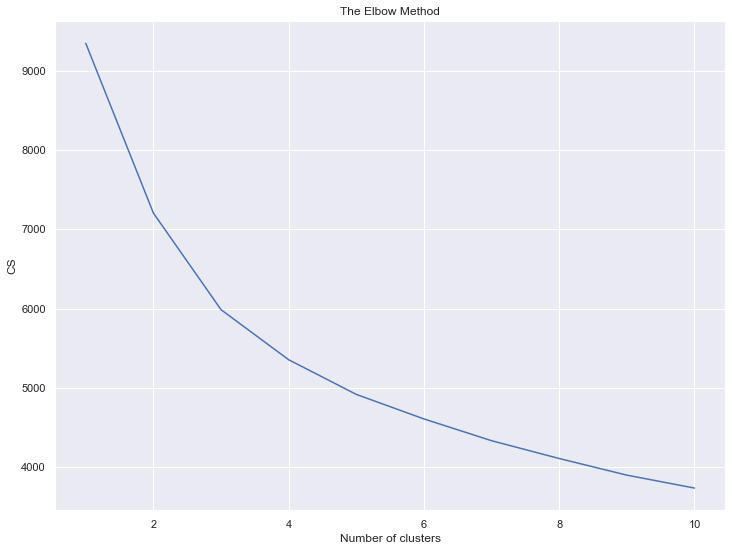

In [1753]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(ind_actifs_quant)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [1754]:
# cela nous dit que le meilleur nombre de clusters reste 2
kmeans = KMeans(n_clusters=3,random_state=0)

kmeans_sel = kmeans.fit(data_encoded.loc[:,continuous_vars])


labels = kmeans.labels_
labels_df = pd.DataFrame(kmeans_sel.labels_)

# check how many of the samples were correctly labeled

correct_labels = sum(target_cannabis == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, target_cannabis.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(target_cannabis.size)))

Result: 706 out of 1869 samples were correctly labeled.
Accuracy score: 0.38


On peut garder ce nombre de cluster

On trouve finalement que le pic d'accuracy est à 3 cluster ce qui nous donne ainsi 3 catégories de consommateurs de cannabis

In [1755]:
clustered_data = data_encoded.loc[:,continuous_vars].assign(Cluster = labels )
grouped_km = clustered_data.groupby(['Cluster']).mean().round(0)
grouped_km


,Stress_score,cscore,communicative_score,impulsive_score,age
Cluster,,,,,
0,52.0,54.0,44.0,42.0,37.0
1,59.0,40.0,54.0,101.0,27.0
2,45.0,56.0,55.0,74.0,33.0


Ici,<br> 0 : NeverUsed<br>
     1 : Used before this year<br>
     2 : Use this year 

Voici ci-dessus des profils-type de consommateur.

In [1761]:
# nettoyage de fin
del X_train['cannabis']

## Supervised Learning

En premier lieu, nous allons prendre comme target la drogue la plus utilisée d'après les observations : 
- le cannabis

Peut on-prédire la fréquence de consommation de cannbsi chez les jeunes selon :
- leur profil (age, profil, ethnicité,nombre de drogues déjà consommés )
- leur personnalité (communicatif)
- et selon les deux à la fois 

#### *Support Vector Machine*

In [1769]:
for col in Y_train.columns :
    svc=SVC() 
    svc.fit(X_train, Y_train.loc[:,col])
    y_pred=svc.predict(X_test)
    print('SVC accuracy for the target \'',col,'\' is {0:0.3f}'. format(accuracy_score(Y_test.loc[:,col],y_pred)))

Model accuracy for the target ' alcohol ' is 0.822
Model accuracy for the target ' amphet ' is 0.556
Model accuracy for the target ' benzos ' is 0.556
Model accuracy for the target ' cannabis ' is 0.588
Model accuracy for the target ' coke ' is 0.649
Model accuracy for the target ' crack ' is 0.879
Model accuracy for the target ' ecstasy ' is 0.576
Model accuracy for the target ' heroin ' is 0.866
Model accuracy for the target ' ketamine ' is 0.779
Model accuracy for the target ' legalhigh ' is 0.677
Model accuracy for the target ' LSD ' is 0.638
Model accuracy for the target ' meth ' is 0.759
Model accuracy for the target ' mushrooms ' is 0.611
Model accuracy for the target ' nicotine ' is 0.501


In [1773]:
svc=SVC() 
svc.fit(X_train, Y_train['cannabis'])
y_pred=svc.predict(X_test)
cm = confusion_matrix(Y_test['cannabis'], y_pred)
cm

array([[ 46,  73,   8],
       [ 31,  95,  78],
       [  3,  38, 189]], dtype=int64)

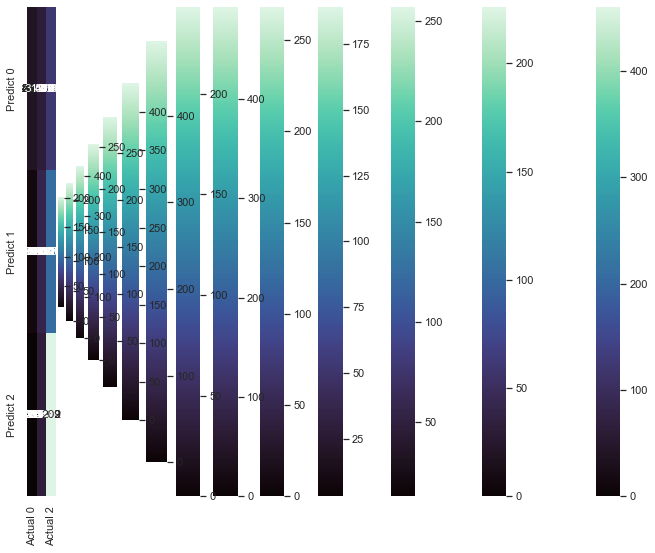

In [1774]:
for col in Y_train.columns: 
    svc=SVC() 
    svc.fit(X_train, Y_train.loc[:,col])
    y_pred=svc.predict(X_test)
    cm = confusion_matrix(Y_test.loc[:,col], y_pred)
    cm_matrix = pd.DataFrame(data=cm, columns=['Actual 0', 'Actual 1','Actual 2'], 
                                 index=['Predict 0', 'Predict 1','Predict 2'])

    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

sns.FacetGrid(exercise, col = "time")

In [ ]:
for col in Y_train.columns :
    svc=SVC() 
    svc.fit(X_train, Y_train.loc[:,col])
    y_pred=svc.predict(X_test)
    print('SVC accuracy for the target \'',col,'\' is {0:0.3f}'. format(accuracy_score(Y_test.loc[:,col],y_pred)))